# 1.Titanic Challange

## 1. Problem understanding and definition </h1>



Titanic, one of the largest and most luxurious ships of its time, hit an iceberg and sank. Over 1,500 people lost their lives, while some managed to survive. But who had the highest chances of survival? Factors like age, ticket class, and gender played a key role.Goal is to analyze passenger data and predict who was most likely to survive.


<h3> Our mission is Predict whether passenger will survive or not.</h3>

In [4]:
# Linear algebra
import numpy as np

# Data manipulation and analysis
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from scipy.stats import skew 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


<p1> 
</p1>


# 2.Investigate the Data

<p1> Training set (train.csv) – This contains passengers and their survival outcomes.
 </p1>
 
 <p1>Test set (test.csv) – This has similar data, we use it to evaluate our model’s performance. This will help us ensure that the model is performing well. </p1>



<img src="data.png" alt="Data Image" width="500">




#### Notes on Variables

##### Pclass:
A proxy for socio-economic status (SES).  
- **1st** = Upper class  
- **2nd** = Middle class  
- **3rd** = Lower class  

##### Age:
- If less than 1 year old, the age is fractional.  
- If estimated, it appears as **xx.5**.

##### SibSp (Siblings/Spouses aboard):
- **Sibling** = Brother, sister, stepbrother, stepsister  
- **Spouse** = Husband, wife (excluding fiancés and mistresses)

##### Parch (Parents/Children aboard):
- **Parent** = Mother, father  
- **Child** = Son, daughter, stepson, stepdaughter  
Some children traveled only with a nanny, so **parch = 0** for them.



### Data loading


In [11]:
# file path
train_path = r"C:\Users\AdminR\Downloads\data-engineering-data-science-group-b\train_data.csv"
test_path = r"C:\Users\AdminR\Downloads\data-engineering-data-science-group-b\test_data.csv"

#Load the CSV file into a Pandas DataFrame
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [12]:
train

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC"
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,912,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,6,NaN,"Paris, France"
912,913,2,1,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S,9,NaN,NaN
913,914,3,0,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S,NaN,NaN,NaN
914,915,1,0,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S,NaN,109.0,London


In [13]:
test

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,NaN,NaN,"Boston, MA"
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,9,NaN,"Sittingbourne, England / San Diego, CA"
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S,16,NaN,"West Haven, CT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,1305,3,0,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,NaN,120.0,NaN
389,1306,3,0,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S,NaN,NaN,NaN
390,1307,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,NaN,110.0,NaN
391,1308,3,0,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"


##### Train and Test Data Overview

- **Train Data:**
  Rows: 916
  Columns: 15


- **Test Data:**
   Rows: 393
   Columns: 15




# 3. Data Understanding  and Missing values


#### DATA DESCRIPTION

<img src="data.png" alt="Data Image" width="500">

<h5> Removing Leading and Trailing Spaces from Column Names</h5>

In [20]:
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


In [21]:

train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [22]:
#Check 
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


In [23]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC"
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,16,NaN,NaN


In [24]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,NaN,NaN,"Boston, MA"
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,9,NaN,"Sittingbourne, England / San Diego, CA"
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S,16,NaN,"West Haven, CT"


In [25]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked,Boat,Home_Dest
count,916,916,916,197,915,345,515
unique,914,2,699,140,3,24,288
top,"Kelly, Mr. James",male,CA. 2343,G6,S,C,"New York, NY"
freq,2,576,7,5,645,30,45


In [26]:
test.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked,Boat,Home_Dest
count,393,393,393,98,392,141,230
unique,393,2,333,84,3,22,160
top,"Palsson, Master. Gosta Leonard",male,CA. 2343,C23 C25 C27,S,5,"New York, NY"
freq,1,267,4,3,269,14,19


#### Missing values

In [28]:
train.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Boat           571
Body           835
Home_Dest      401
dtype: int64

In [29]:
test.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         1
Boat           252
Body           353
Home_Dest      163
dtype: int64

### Explore


<h4> Explore Train_dataset</p1>


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass       916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          724 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Ticket       916 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        197 non-null    object 
 11  Embarked     915 non-null    object 
 12  Boat         345 non-null    object 
 13  Body         81 non-null     float64
 14  Home_Dest    515 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 107.5+ KB


In [33]:
train.describe()

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare,Body
count,916.000000,916.000000,916.000000,724.000000,916.000000,916.000000,915.000000,81.000000
mean,458.500000,2.307860,0.391921,29.243554,0.459607,0.381004,32.022576,162.604938
std,264.570721,0.829236,0.488446,14.164649,0.974823,0.875925,48.378494,101.425919
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,229.750000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,70.000000
50%,458.500000,3.000000,0.000000,28.000000,0.000000,0.000000,14.500000,156.000000
75%,687.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.000000,259.000000
max,916.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<h5> Checking Duplicate and If there are any, display them 

In [35]:
duplicates1 = train.duplicated()
num_duplicates1 = duplicates1.sum()
print("Number of duplicate rows:")
print(num_duplicates1)

if num_duplicates1 > 0:
    print(train[duplicates1])  

Number of duplicate rows:
0


### Train_Data Description 

##### Rows:
- The dataset has 916 rows, each corresponding to a passenger on the Titanic.

##### Columns:
- The dataset has 15 columns, with a mix of numerical and categorical features:

###### **Numerical Columns:**
- `PassengerId`, `Pclass`, `Survival`, `SibSp`, `Parch` (integers).
- `Age`, `Fare`, `Body` (floating point numbers).

###### **Categorical Columns:**
- `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`, `Boat`, `Home_Dest` (objects, likely strings).

#### Missing Values:

- **Age**: There are 724 non-null entries out of 916, indicating that 192 rows have missing age values.
- **Fare**: 915 non-null entries, meaning 1 row has a missing Fare value.
- **Cabin**: This column has very few non-null values (197 out of 916), so it likely won't be very useful in its current state unless you want to derive features like whether a passenger had a cabin (binary feature) or analyze it further.
- **Embarked**: 915 non-null values, indicating 1 missing value for the Embarked column.
- **Boat**: Only 345 non-null values, indicating that many passengers did not have a boat assigned, which might indicate that they did not survive.
- **Body**: This column has very few non-null values (81 out of 916), suggesting that it only contains data for passengers whose bodies were recovered.
- **Home_Dest**: 515 non-null values, with significant missing data. This column may not be immediately useful unless you decide to engineer a feature from it.

##### Duplicates:
- The dataset contains **0 duplicate rows**, meaning there is no redundancy in the data in terms of exact duplicate rows.




---



### Time to explore test_data 

In [38]:
test.describe()

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare,Body
count,393.000000,393.000000,393.000000,322.000000,393.000000,393.000000,393.000000,40.000000
mean,1113.000000,2.264631,0.358779,31.314700,0.590331,0.394402,36.259109,157.175000
std,113.593574,0.857854,0.480253,14.880717,1.179159,0.841930,58.842330,90.807739
min,917.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,4.000000
25%,1015.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,90.000000
50%,1113.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.000000,151.500000
75%,1211.000000,3.000000,1.000000,40.000000,1.000000,0.000000,35.500000,213.750000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200,314.000000


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Pclass       393 non-null    int64  
 2   Survival     393 non-null    int64  
 3   Name         393 non-null    object 
 4   Sex          393 non-null    object 
 5   Age          322 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        98 non-null     object 
 11  Embarked     392 non-null    object 
 12  Boat         141 non-null    object 
 13  Body         40 non-null     float64
 14  Home_Dest    230 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 46.2+ KB


In [40]:
duplicates1 = test.duplicated()
num_duplicates1 = duplicates1.sum()
print("Number of duplicate rows:")
print(num_duplicates1)

if num_duplicates1 > 0:
    print(train[duplicates1])  


Number of duplicate rows:
0



#### Key Observations from the Test Data

##### Missing Values:

- **Age**: There are 322 non-null entries out of 393, indicating that 71 rows have missing age values.
- **Fare**: All 393 entries are non-null, so there are no missing fare values.
- **Cabin**: This column has very few non-null values (98 out of 393), so it is sparse and unlikely to be useful unless you derive features like whether a passenger had a cabin (binary feature).
- **Embarked**: 392 non-null values, meaning 1 missing value for the Embarked column.
- **Boat**: Only 141 non-null values, which could imply that many passengers did not have a boat assigned (possibly indicating that they did not survive).
- **Body**: This column has very few non-null values (40 out of 393), suggesting that it only contains data for passengers whose bodies were recovered.
- **Home_Dest**: 230 non-null values, with significant missing data. This column may not be immediately useful unless you decide to engineer a feature from it.

##### Data Types:
- The data types are appropriate for most of the columns:
  - **Numerical**: Columns like `Pclass`, `SibSp`, `Parch`, etc., are correctly identified as integers, and `Age`, `Fare`, `Body` are recognized as floats.
  - **Categorical**: Columns like `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`, `Boat`, and `Home_Dest` are correctly identified as objects (strings).

##### Duplicates:
- The dataset contains **0 duplicate rows**, meaning there is no redundancy in the data in terms of exact duplicate rows.


### Distribution of data

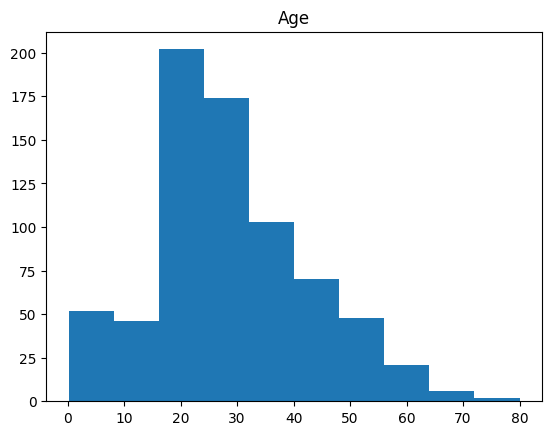

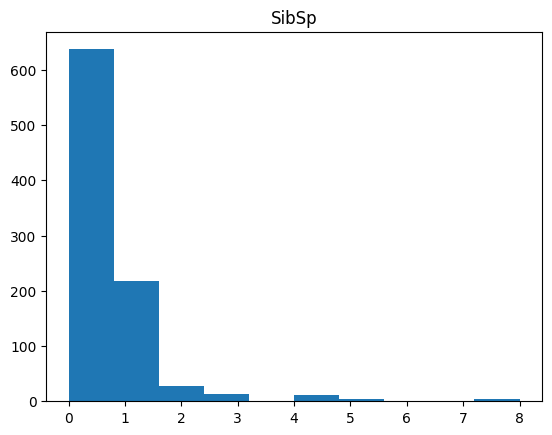

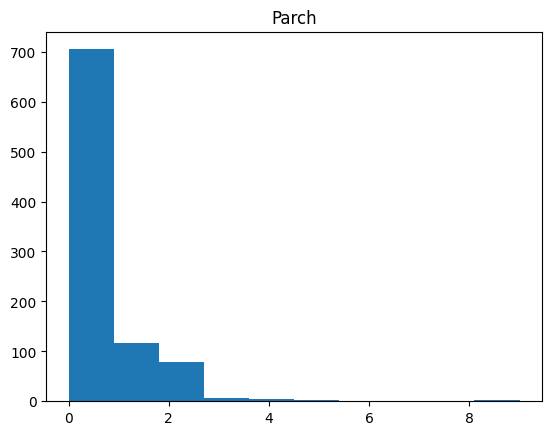

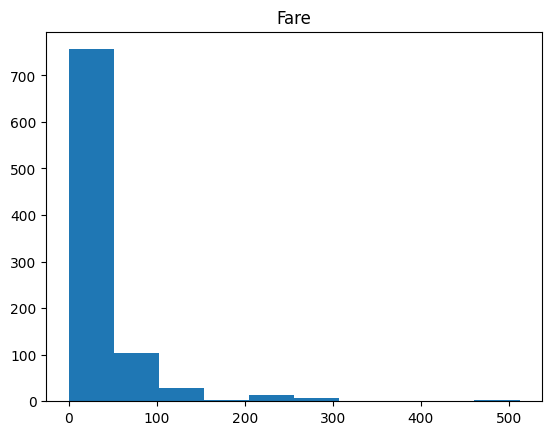

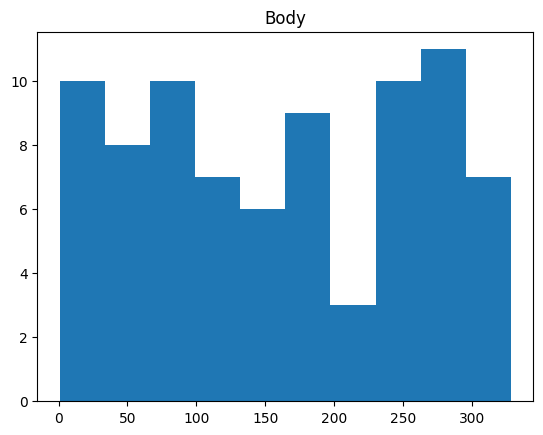

In [43]:
df_num = train[['Age','SibSp','Parch','Fare', 'Body']]
df_cat = train[['Survival','Pclass','Sex','Ticket','Cabin','Embarked', 'Home_Dest']]


#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare      Body
Age    1.000000 -0.222299 -0.161438  0.170287  0.022391
SibSp -0.222299  1.000000  0.348905  0.173072 -0.069815
Parch -0.161438  0.348905  1.000000  0.209837  0.077856
Fare   0.170287  0.173072  0.209837  1.000000  0.047809
Body   0.022391 -0.069815  0.077856  0.047809  1.000000


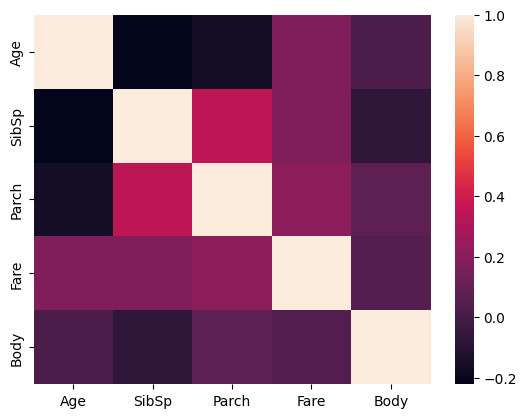

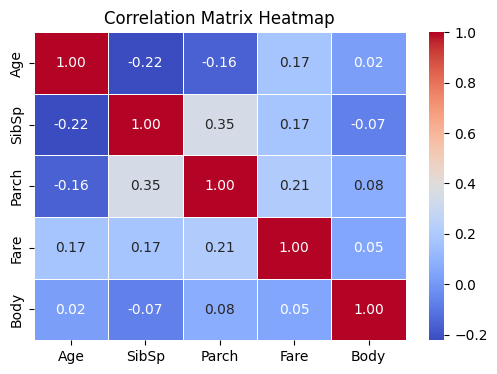

In [44]:
print(df_num.corr())
sns.heatmap(df_num.corr())


plt.figure(figsize=(6,4)) 
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


<H3> Visualizing categorical distributions </H3>

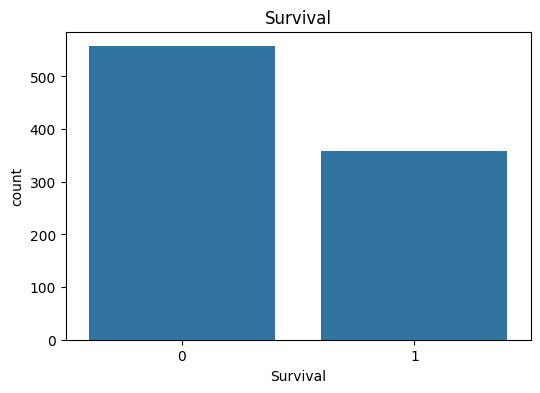

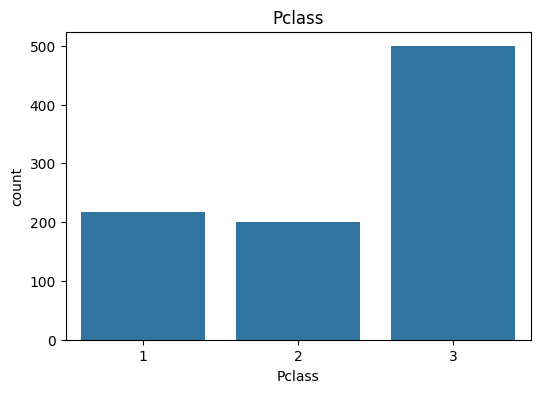

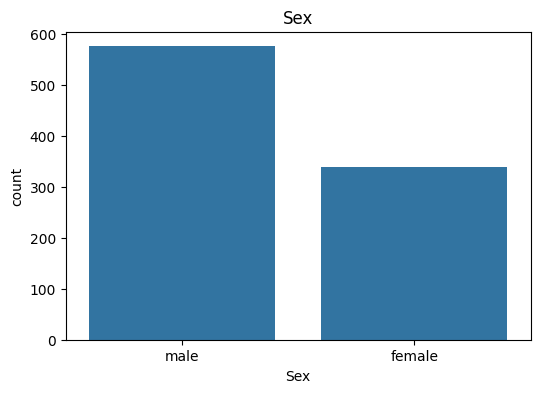

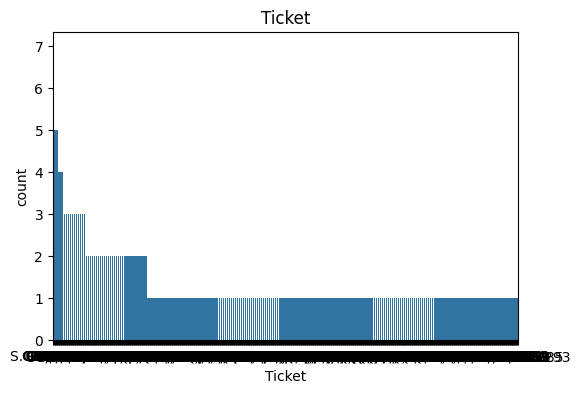

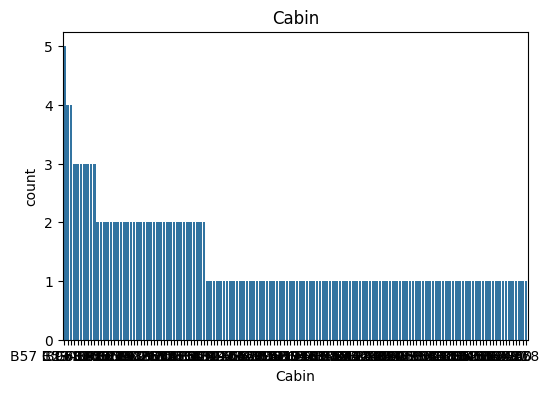

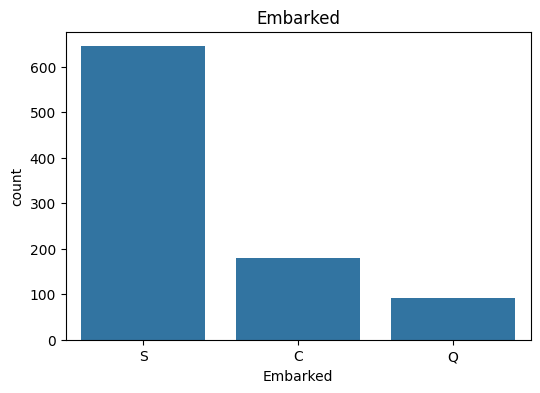

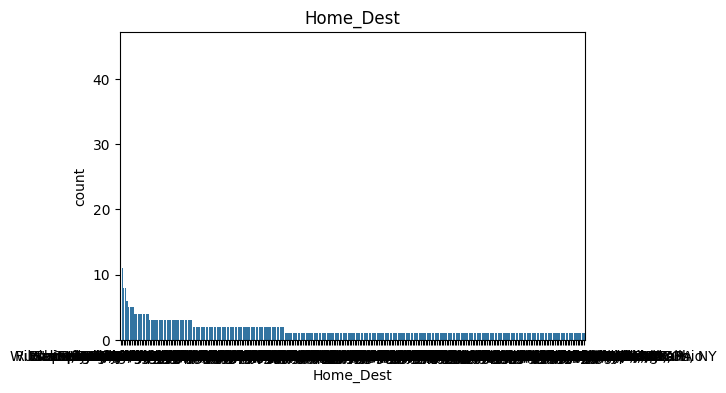

In [46]:

# Visualizing categorical distributions
for i in df_cat.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts())
    plt.title(i)
    plt.show()



##  Missing Values


### Missing/Null Values in the Data

There are some missing or null values in the following columns:

- **Age**
- **Fare**
- **Cabin**
- **Embarked**
- **Boat**
- **Body**
- **Home_Dest**

These columns contain null or missing values that need to be handled during data preprocessing.


In [50]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
Body,835,91.2
Cabin,719,78.5
Boat,571,62.3
Home_Dest,401,43.8
Age,192,21.0
Embarked,1,0.1
Fare,1,0.1
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0


In [51]:
total1 = test.isnull().sum().sort_values(ascending=False)
percent_1 = test.isnull().sum()/test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total1, percent_2], axis=1, keys=['Total1', '%'])
missing_data.head(15)

,Total1,%
Body,353,89.8
Cabin,295,75.1
Boat,252,64.1
Home_Dest,163,41.5
Age,71,18.1
Embarked,1,0.3
Pclass,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0


In [52]:
missing_values_summary = train.isnull().sum()
print(missing_values_summary)


PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Boat           571
Body           835
Home_Dest      401
dtype: int64


In [53]:
missing_values_summary1 = test.isnull().sum()
print(missing_values_summary)

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Boat           571
Body           835
Home_Dest      401
dtype: int64


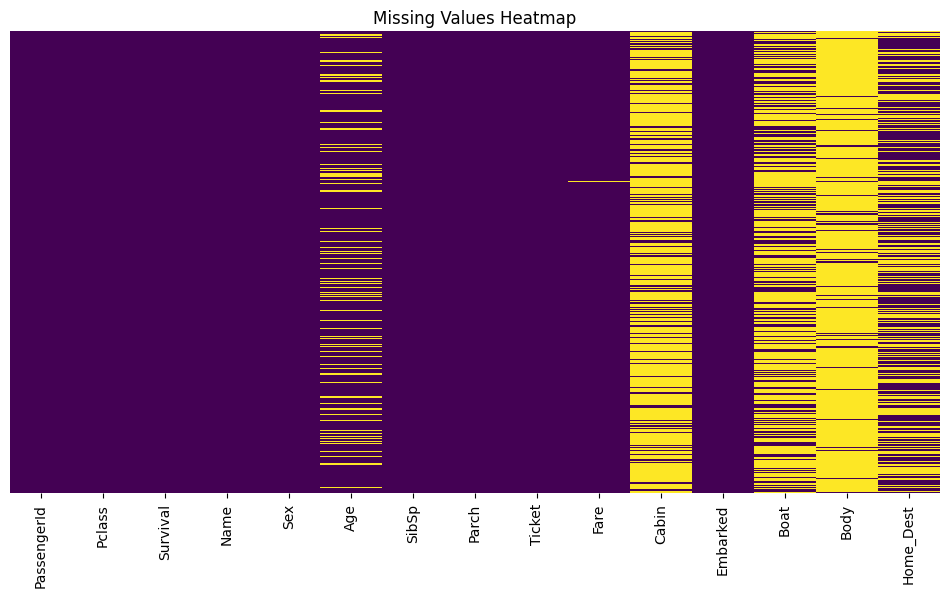

In [54]:
# Function to create a missing value heatmap
def plot_missing_values_heatmap(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title("Missing Values Heatmap")
    plt.show()

# Call the function to plot the heatmap for missing values
plot_missing_values_heatmap(train)


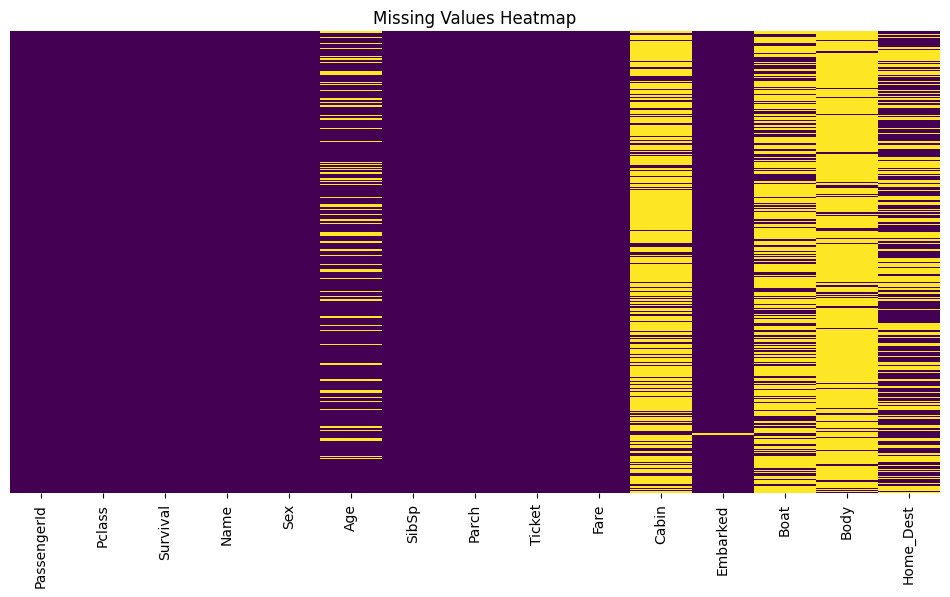

In [55]:
# Call the function to plot the heatmap for missing values in test
plot_missing_values_heatmap(test)

#### Missing Values Summary:
##### **Train Data**:
- **High Missing**: 
  - Body (91.2%)
  - Cabin (78.5%)
  - Boat (62.3%)
  
- **Moderate Missing**: 
  - Home_Dest (43.8%)
  - Age (21.0%)
  
- **Low Missing**: 
  - Fare (0.1%)
  - Embarked (0.1%)

##### **Test Data**:
- **High Missing**: 
  - Body (89.8%)
  - Cabin (75


###  Handling Values  


##### Drop some columns

In [59]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC"
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,16,NaN,NaN


In [60]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,NaN,NaN,"Boston, MA"
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,9,NaN,"Sittingbourne, England / San Diego, CA"
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S,16,NaN,"West Haven, CT"


<h5>At first, I decided to drop the `boat`, `body`, and `home_dest` columns. However, I need to provide justification for this decision. </h5>

In [62]:
print(train[['Boat', 'Body', 'Home_Dest']].isnull().sum() / len(train) * 100)


Boat         62.336245
Body         91.157205
Home_Dest    43.777293
dtype: float64


In [63]:
print(train.corr(numeric_only=True)['Survival'].sort_values(ascending=False))


Survival       1.000000
Fare           0.251780
Parch          0.107847
SibSp         -0.013769
PassengerId   -0.015261
Age           -0.066800
Pclass        -0.290122
Body                NaN
Name: Survival, dtype: float64


In [64]:
print(train["Boat"].values)
print(train[["PassengerId", "Boat"]])

print(train["Boat"].isnull().sum())


['13' nan nan '10' '16' 'B' nan nan nan 'C' nan '15' nan nan nan nan '5'
 '12' nan nan '8' 'C' '10' 'D' '5' nan '11' nan nan '11' nan nan 'C' '11'
 '2' '9' 'D' nan nan '14' nan nan nan nan nan '10' '15' nan nan 'C' '9'
 nan 'C' 'D' nan nan nan nan nan nan nan nan nan nan 'D' 'C' '3' nan nan
 '15' '6' '12' nan nan nan nan '16' '8' nan '14' nan 'C' 'B' nan '4' nan
 'C' nan nan nan '15' 'C' nan '7' nan nan nan nan nan 'D' '5' '11' '8'
 '14' nan nan nan nan nan '10' '2' nan nan nan '12' nan nan nan nan '12'
 nan nan nan '10' nan '4' nan nan nan nan nan 'C' '8' nan '5' nan 'A' '13'
 nan '10' nan nan '12' nan nan '16' '14' nan '14' '13' nan '3' nan nan
 '13' '4' nan nan nan '7' nan nan '13' nan nan '16' nan nan nan nan nan
 nan nan nan nan '9' '10' '9' nan '14' nan nan nan '13' nan 'C' nan nan
 '5' '7' '4' nan '16' nan '13' '13' nan nan 'D' '6' '14' nan nan '7' '4'
 nan '1' '14' '13' '15' nan nan nan nan nan nan '8' '4' '12' nan nan nan
 '12' nan 'D' nan nan nan nan nan 'C' nan nan '11' 'A' 

In [65]:
print(train["Body"].values)

[ nan 292.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  81.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
 135.  nan 206.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
 284.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 124.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan   1.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 299.  nan
  nan  nan  nan 101.  nan  nan  nan  79.  nan  nan  68.  nan  nan  nan
  nan  nan  nan  nan  nan  nan  32.  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  97.  nan  nan
 328. 

In [66]:
print(train["Home_Dest"].values)

[nan 'Vancouver, BC' 'Portugal' 'Hudson, NY' nan 'Haverford, PA' nan nan
 nan 'Bryn Mawr, PA' 'Trenton, NJ' nan nan nan
 'Catford, Kent / Detroit, MI' nan 'Paris, France / New York, NY'
 'Woodford County, KY' 'Penzance, Cornwall / Akron, OH' nan
 'London, England' nan 'Tokyo, Japan' 'Scituate, MA' 'New York, NY'
 'Duluth, MN' 'London, England Norfolk, VA'
 'Medeltorp, Sweden Chicago, IL' 'Montreal, PQ / Chesterville, ON'
 'Guntur, India / Benton Harbour, MI' nan
 'West Hampstead, London / Neepawa, MB' nan
 'Montreal, PQ / Chesterville, ON' 'St Louis, MO' nan 'New York, NY'
 'Broomfield, Chelmsford, England' nan 'Cornwall / Akron, OH'
 'Huntington, WV' nan nan nan 'Sweden  Worcester, MA'
 'Devon, England Wichita, KS' nan nan 'Illinois, USA' 'Ottawa, ON'
 'Paris, France' 'Victoria, BC' nan 'England Albion, NY' nan
 'New York, NY' nan nan nan nan 'Westcliff-on-Sea, Essex' 'New York, NY'
 'Southington / Noank, CT' 'Goteborg, Sweden / Rockford, IL'
 'Ruotsinphytaa, Finland New York, NY' nan

 ##### Data Column Analysis:

- **Boat:** This column represents lifeboat numbers. Since lifeboats were assigned after the disaster, this is not useful for predicting survival.  
- **Body:** This column indicates recovered bodies, which is only available for deceased passengers, making it irrelevant for predictive modeling.  
- **Home_Dest:** A textual column with diverse values that will not contribute to survival prediction.  


In [68]:
train.drop(columns=['Boat', 'Body', 'Home_Dest'], inplace=True)
test.drop(columns=['Boat', 'Body', 'Home_Dest'], inplace=True)

In [69]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S


In [70]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S


In [71]:
train.isnull().sum()


PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
dtype: int64

In [72]:
test.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         1
dtype: int64

#### Name

<p1> Since we can't gain useful insight from the "Name" feature, we can create a new feature called "Title.

In [75]:
data = [train, test] 
    

In [76]:
for dataset in data:
    if 'Name' in dataset.columns:
        dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    else:
        print("No 'Name' column found in dataset")


In [77]:
train['Title'].value_counts()
test['Title'].value_counts()

Title
Mr        245
Miss       67
Mrs        57
Master     16
Dr          2
Col         2
Ms          1
Mlle        1
Rev         1
Major       1
Name: count, dtype: int64

In [78]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [79]:
train.head(5)
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S,2


In [80]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,2


In [81]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S,2


###  Handling Missing Values  

#### Handling missing values in age

Since there are many missing values in the `Age` column (192 data points in train_data and 71 in test_data), we can normalize this feature by creating a model to predict the missing ages based on other relevant features.  

To achieve this, we use an **XGBoost Regressor**, training it on passengers with known ages. The model learns patterns from features such as `Pclass`, `SibSp`, `Parch`, `Fare`, and `Title`. Once trained, we apply it to predict missing ages in both the training and test sets.

In [85]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,2


In [86]:
import xgboost as xgb
from xgboost import XGBRegressor

# Selecting features related to age prediction
age_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Title']

# Train model on known ages
train_age = train[train['Age'].notnull()]
test_age = train[train['Age'].isnull()]

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_reg.fit(train_age[age_features], train_age['Age'])

# Predict missing ages
train.loc[train['Age'].isnull(), 'Age'] = xgb_reg.predict(test_age[age_features])

#for test set
test_age_missing = test[test['Age'].isnull()]
test.loc[test['Age'].isnull(), 'Age'] = xgb_reg.predict(test_age_missing[age_features])


In [87]:
train.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Title            0
dtype: int64

In [88]:
test.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         1
Title            0
dtype: int64

In [89]:
train["Age"].isnull().sum()

np.int64(0)

In [90]:
test["Age"].isnull().sum()

np.int64(0)

#### Handling Missing values in Cabin

In [92]:
def impute_cabin(df):
    df['Cabin'] = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
    return df


In [93]:
train[train["Cabin"].isnull()]


,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.000000,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,0
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,2926,26.0000,NaN,S,2
6,7,3,0,"Willey, Mr. Edward",male,29.852646,0,0,S.O./P.P. 751,7.5500,NaN,S,0
7,8,3,0,"Razi, Mr. Raihed",male,25.783543,0,0,2629,7.2292,NaN,C,0
8,9,3,0,"Yousseff, Mr. Gerious",male,30.582191,0,0,2627,14.4583,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,3,0,"O'Donoghue, Ms. Bridget",female,25.859224,0,0,364856,7.7500,NaN,Q,3
912,913,2,1,"Smith, Miss. Marion Elsie",female,40.000000,0,0,31418,13.0000,NaN,S,1
913,914,3,0,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.000000,1,0,A/5. 3336,16.1000,NaN,S,2
914,915,1,0,"Rowe, Mr. Alfred G",male,33.000000,0,0,113790,26.5500,NaN,S,0


In [94]:
test[test["Cabin"].isnull()]

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,2689,14.4583,NaN,C,2
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.0000,NaN,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,13.9000,NaN,S,2
5,922,1,0,"Robbins, Mr. Victor",male,31.333597,0,0,PC 17757,227.5250,NaN,C,0
6,923,3,0,"Elias, Mr. Tannous",male,15.000000,1,1,2695,7.2292,NaN,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,1301,3,0,"Nancarrow, Mr. William Henry",male,33.000000,0,0,A./5. 3338,8.0500,NaN,S,0
387,1304,3,0,"Hansen, Mr. Claus Peter",male,41.000000,2,0,350026,14.1083,NaN,S,0
389,1306,3,0,"Dika, Mr. Mirko",male,17.000000,0,0,349232,7.8958,NaN,S,0
391,1308,3,0,"Andersson, Miss. Ingeborg Constanzia",female,9.000000,4,2,347082,31.2750,NaN,S,1


In [95]:
# Apply imputation function
train = impute_cabin(train)
test= impute_cabin(test)

# Check missing values after imputation
print("Train missing Cabin values:", train['Cabin'].isnull().sum())  
print("Test missing Cabin values:", test['Cabin'].isnull().sum())  


Train missing Cabin values: 0
Test missing Cabin values: 0


In [96]:
train.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       1
Title          0
dtype: int64

In [97]:
test.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       1
Title          0
dtype: int64

#### Handling missing values in Embarked

In [99]:
train['Embarked'].describe()


count     915
unique      3
top         S
freq      645
Name: Embarked, dtype: object

In [100]:
test['Embarked'].describe()

count     392
unique      3
top         S
freq      269
Name: Embarked, dtype: object

In [101]:
train['Embarked'] = train.groupby(['Pclass', 'Fare'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'S'))
test['Embarked'] = test.groupby(['Pclass', 'Fare'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'S'))



In [102]:
train.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       1
Title          0
dtype: int64

In [103]:
test.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [104]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,D,S,2


In [105]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,2689,14.4583,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,244368,13.0000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,PC 17483,221.7792,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.0000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,13.9000,F G63,S,2


#### Handling missing values in Fare

In [107]:
print(train["Fare"].values)

[ 16.7     75.2417   7.05    77.9583  26.     110.8833   7.55     7.2292
  14.4583 120.      35.5      7.775    7.7292  23.45    10.5      7.925
  89.1042  26.      11.5      7.775   86.5     15.7417  13.      53.1
 133.65    55.9      9.35     7.8542 151.55    39.      21.075   73.5
   8.05   151.55   211.3375  69.3     79.2      8.05     9.5     23.
  60.       8.05     8.05     9.5     31.3875  20.575    7.775    6.2375
   7.25     7.225   39.4     25.5875  15.2458   7.55     9.325    5.
  18.7875   7.225    7.8958  42.4     26.55    82.1708  51.8625  13.
  15.85    11.2417 134.5      7.8792   7.7333  31.3875  80.      21.
  16.1     20.2125   8.6833 247.5208   7.8792  79.65    23.45    23.
   7.775   19.2583   7.75    30.0708 120.      69.55     7.8875   7.8958
  24.       7.25     6.975    8.05    61.175   83.1583 227.525    8.6625
  26.55     7.2292  15.05     7.75    27.7208   9.5     76.2917  10.5
  26.55   136.7792   8.05     7.925   13.      32.5    211.3375   7.225
   7.8958

In [108]:
train_test_data = [train, test] 

In [109]:
train[train["Fare"] == 0]



,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
117,118,1,0,"Fry, Mr. Richard",male,41.262383,0,0,112058,0.0,B102,S,0
118,119,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0,A36,S,0
143,144,2,0,"Knight, Mr. Robert J",male,26.620966,0,0,239855,0.0,D,S,0
205,206,3,0,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,G6,S,0
258,259,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,26.620966,0,0,239854,0.0,D,S,0
344,345,2,0,"Watson, Mr. Ennis Hastings",male,26.620966,0,0,239856,0.0,D,S,0
419,420,2,0,"Cunningham, Mr. Alfred Fleming",male,26.620966,0,0,239853,0.0,D,S,0
480,481,1,0,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0,B57 B59 B63 B66,S,3
494,495,1,0,"Parr, Mr. William Henry Marsh",male,41.262383,0,0,112052,0.0,B57 B59 B63 B66,S,0
575,576,1,1,"Ismay, Mr. Joseph Bruce",male,49.000000,0,0,112058,0.0,B52 B54 B56,S,0


In [110]:
train[train["Fare"].isnull() ]

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
297,298,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,G6,NaN,0


In [111]:
# Replace 0 values in "Fare" column with NaN (null values)
train["Fare"] = train["Fare"].replace(0, np.nan)

train[train["Fare"].isna()]


,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
117,118,1,0,"Fry, Mr. Richard",male,41.262383,0,0,112058,NaN,B102,S,0
118,119,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,NaN,A36,S,0
143,144,2,0,"Knight, Mr. Robert J",male,26.620966,0,0,239855,NaN,D,S,0
205,206,3,0,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,NaN,G6,S,0
258,259,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,26.620966,0,0,239854,NaN,D,S,0
297,298,3,0,"Storey, Mr. Thomas",male,60.500000,0,0,3701,NaN,G6,NaN,0
344,345,2,0,"Watson, Mr. Ennis Hastings",male,26.620966,0,0,239856,NaN,D,S,0
419,420,2,0,"Cunningham, Mr. Alfred Fleming",male,26.620966,0,0,239853,NaN,D,S,0
480,481,1,0,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,NaN,B57 B59 B63 B66,S,3
494,495,1,0,"Parr, Mr. William Henry Marsh",male,41.262383,0,0,112052,NaN,B57 B59 B63 B66,S,0


In [112]:
train[train["Fare"] == 0]

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


##### Do same for test

In [114]:
test[test["Fare"] == 0]

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
20,937,3,0,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,F G63,S,0
190,1107,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,41.262383,0,0,112051,0.0,C23 C25 C27,S,0
243,1160,2,0,"Campbell, Mr. William",male,26.620966,0,0,239853,0.0,F4,S,0
305,1222,2,0,"Parkes, Mr. Francis ""Frank""",male,26.620966,0,0,239853,0.0,F4,S,0
372,1289,3,1,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,F G63,S,0
380,1297,3,0,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,F G63,S,0
390,1307,1,0,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,0


In [115]:
test[test["Fare"].isnull() ]

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [116]:
test["Fare"] = test["Fare"].replace(0, np.nan)
test[test["Fare"].isna()]


,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
20,937,3,0,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,NaN,F G63,S,0
190,1107,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,41.262383,0,0,112051,NaN,C23 C25 C27,S,0
243,1160,2,0,"Campbell, Mr. William",male,26.620966,0,0,239853,NaN,F4,S,0
305,1222,2,0,"Parkes, Mr. Francis ""Frank""",male,26.620966,0,0,239853,NaN,F4,S,0
372,1289,3,1,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,NaN,F G63,S,0
380,1297,3,0,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,NaN,F G63,S,0
390,1307,1,0,"Harrison, Mr. William",male,40.000000,0,0,112059,NaN,B94,S,0


In [117]:
# Fill missing values in "Fare" with the median "Fare" based on the "Pclass" group
train["Fare"] = train.groupby("Pclass")["Fare"].transform("median")
test["Fare"] = test.groupby("Pclass")["Fare"].transform("median")


In [118]:
print(train["Fare"].isnull().sum())


0


In [119]:
print(test["Fare"].isnull().sum())

0


In [120]:
train.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       1
Title          0
dtype: int64

In [121]:
test.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [122]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,17.3750,D,S,2


In [123]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,2689,8.0500,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,244368,13.5000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,PC 17483,60.3896,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.5000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,8.0500,F G63,S,2


In [124]:
test.isnull().sum()

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

# 4.Exploratory Data Analysis(EDA)

 #### Exploratory Data Analysis (EDA)

In this EDA section, I will explore the dataset and identify important insights that will guide the development of the future model. By analyzing the available features, I aim to uncover patterns, detect any missing or null values, and evaluate the relationships between variables.


### Outliers

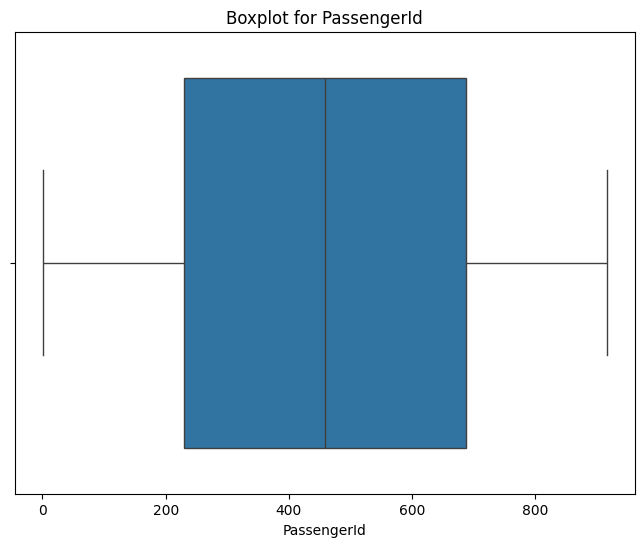

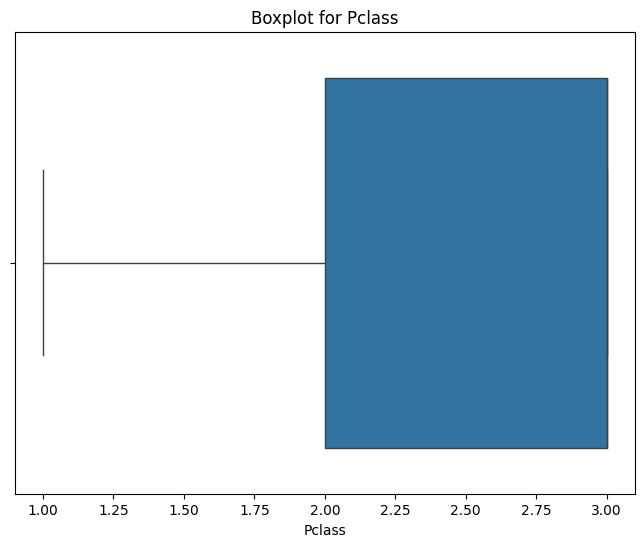

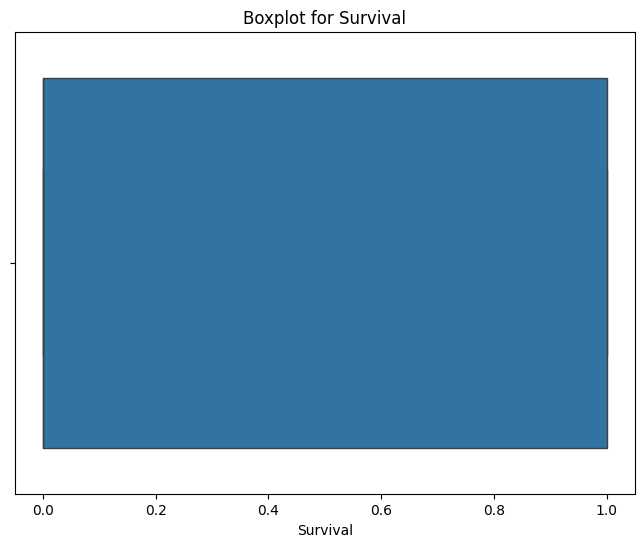

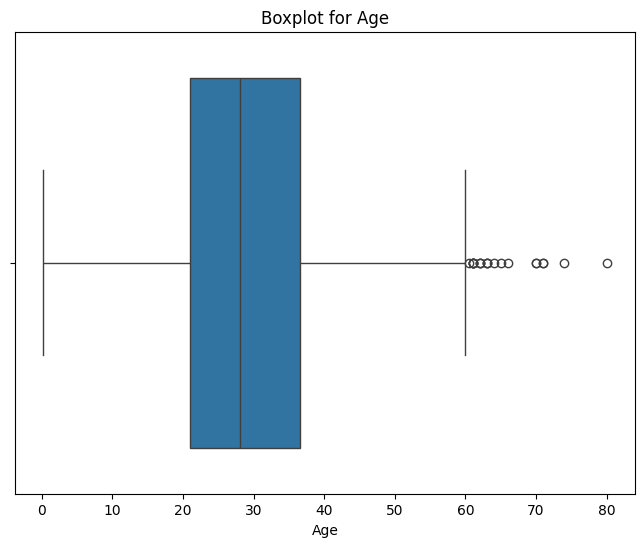

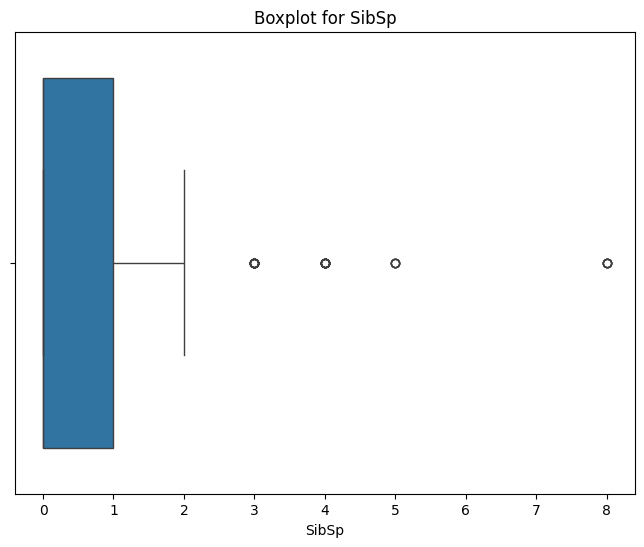

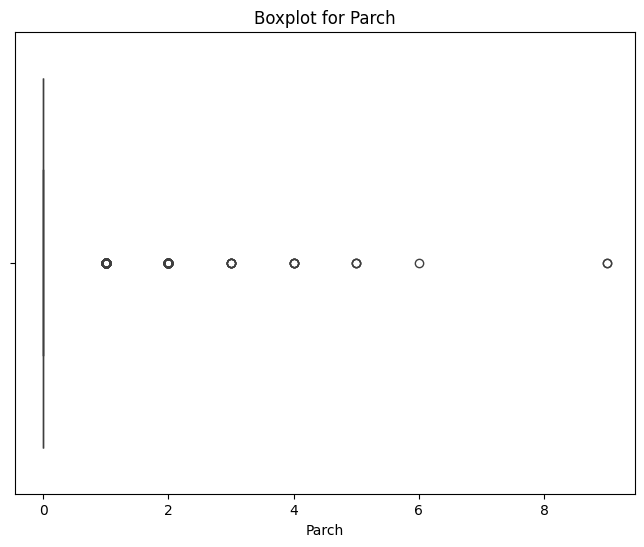

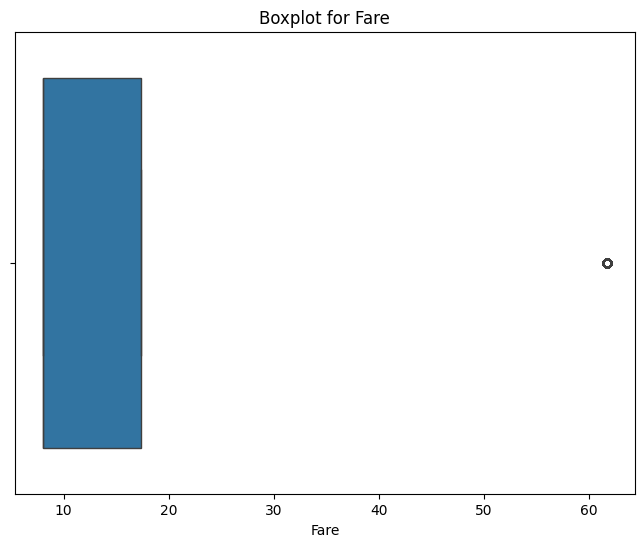

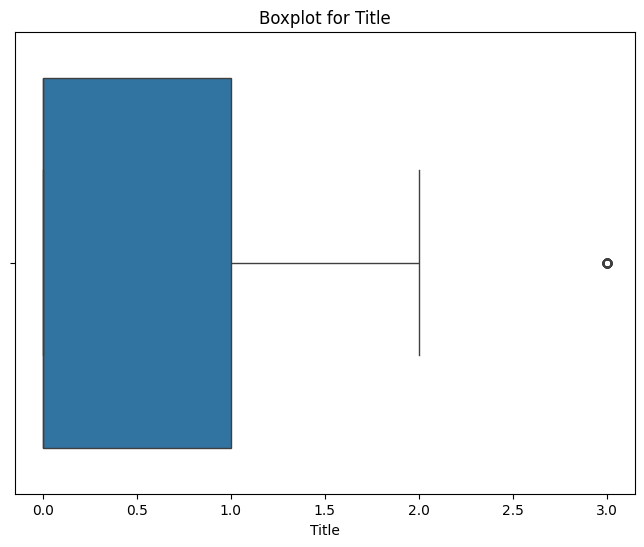

In [128]:

# Get the list of numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


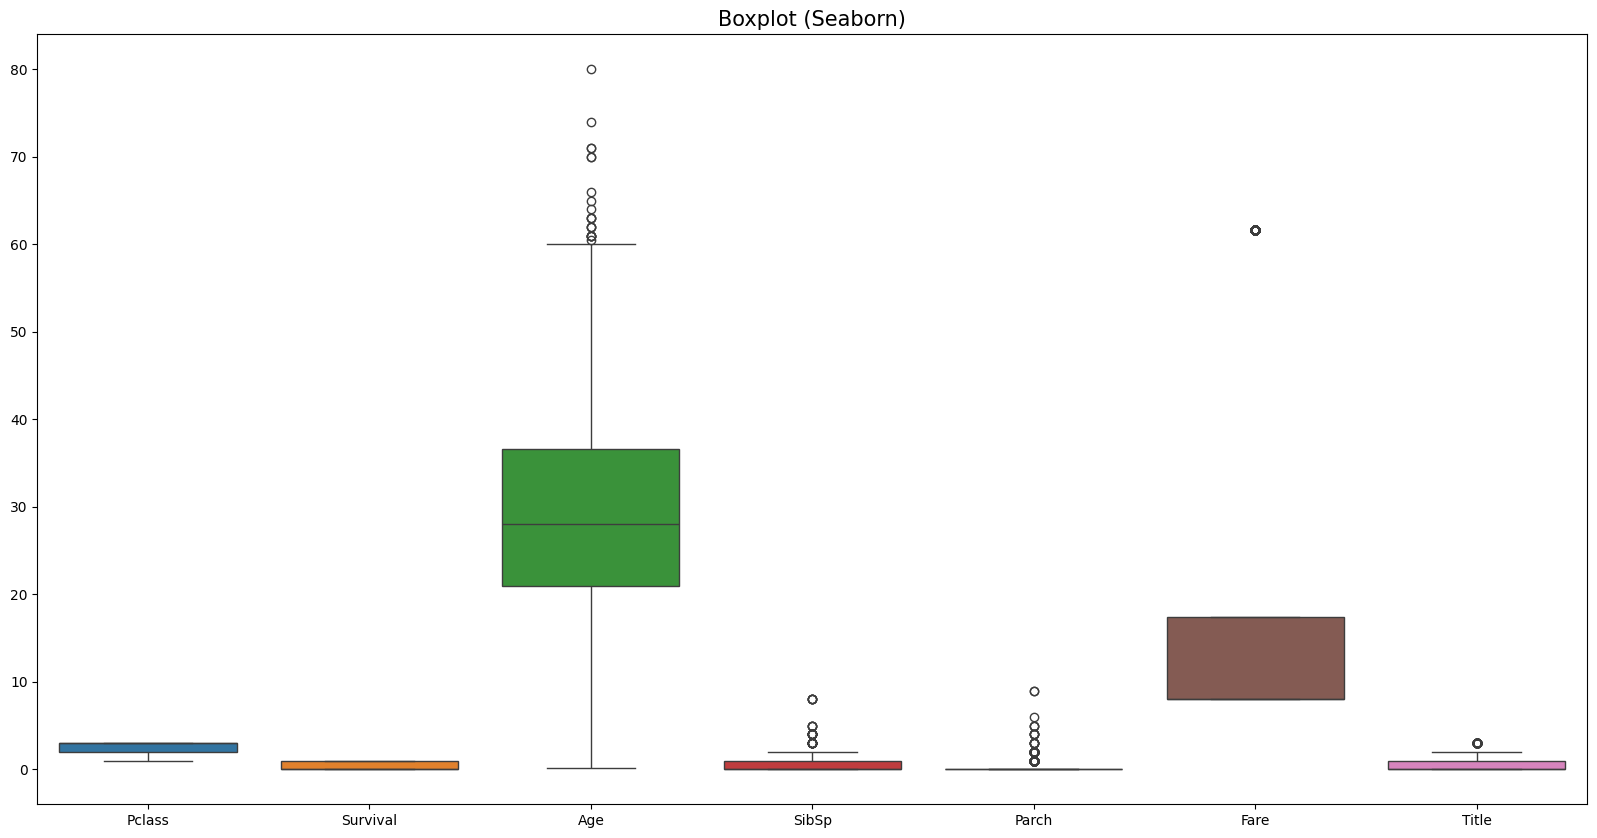

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=train.drop('PassengerId', axis=1))
plt.title("Boxplot (Seaborn)", fontsize=15)
plt.show()

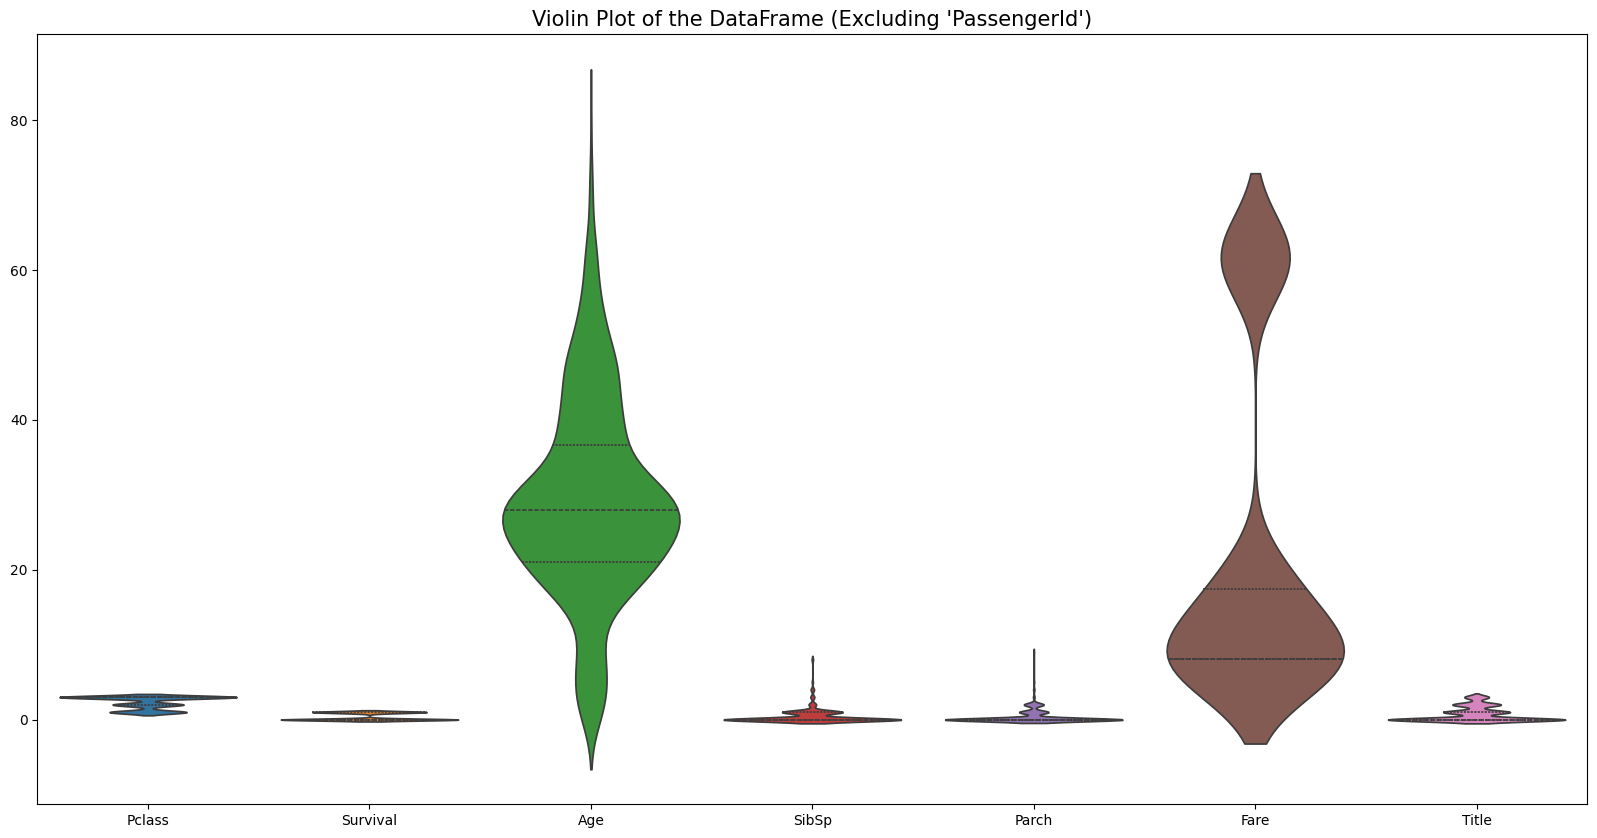

In [130]:
# Violin plot for each numeric column
plt.figure(figsize=(20, 10))
sns.violinplot(data=train.drop('PassengerId', axis=1), inner="quart")
plt.title("Violin Plot of the DataFrame (Excluding 'PassengerId')", fontsize=15)
plt.show()



#### Outliers Age and Fare

##### age

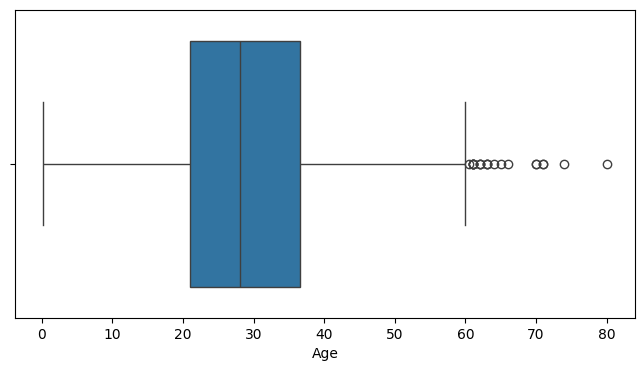

In [133]:
# looking inside Age variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Age'])
plt.show()

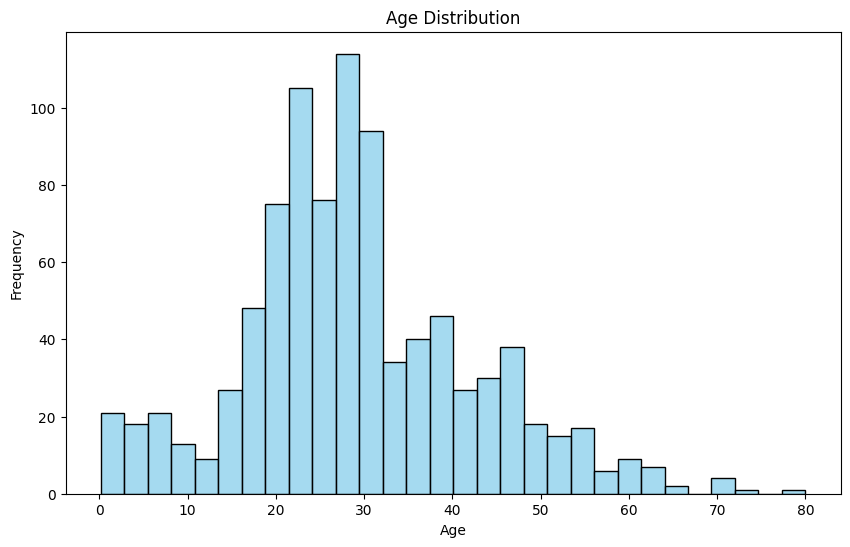

In [134]:

plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\AdminR\AppData\Local\Temp\ipykernel_15904\1114463310.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['Age'], shade=True, color='skyblue')


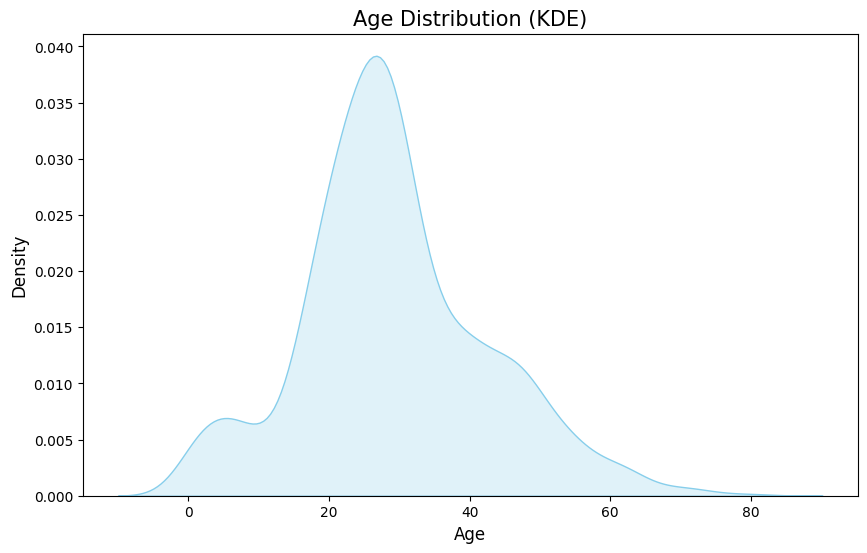

In [135]:
plt.figure(figsize=(10, 6))
sns.kdeplot(train['Age'], shade=True, color='skyblue')
plt.title("Age Distribution (KDE)", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()


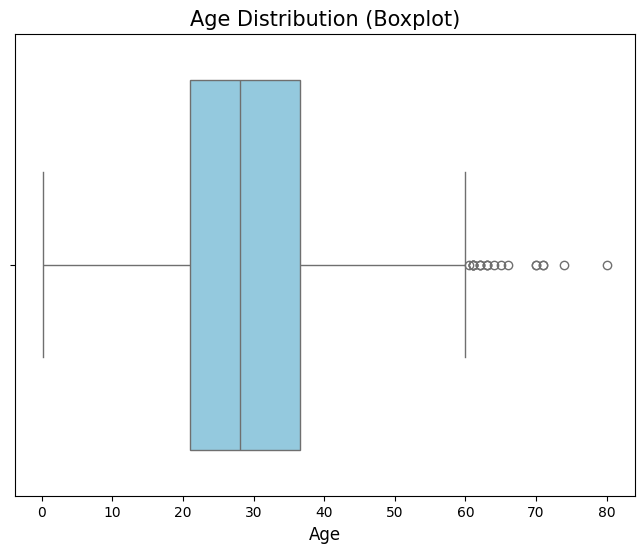

In [136]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Age'], color='skyblue')
plt.title("Age Distribution (Boxplot)", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.show()


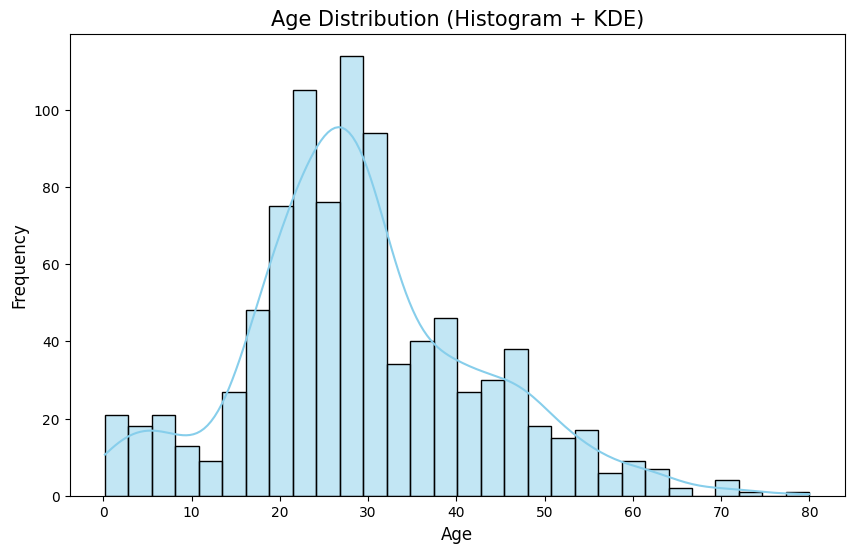

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution (Histogram + KDE)", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


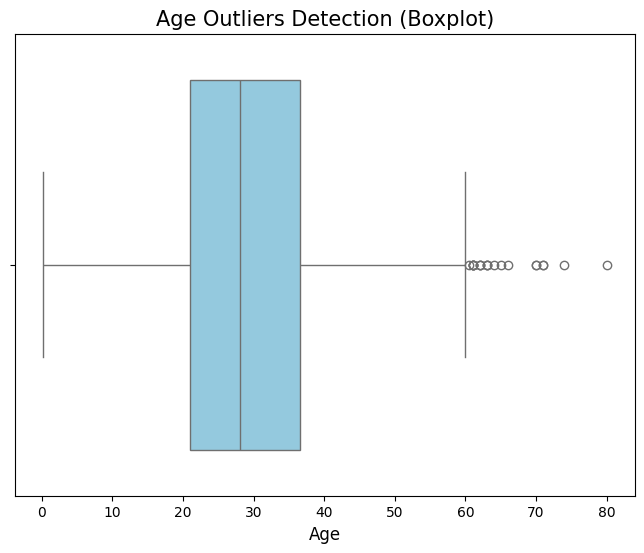

In [138]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Age'], color='skyblue')
plt.title("Age Outliers Detection (Boxplot)", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.show()


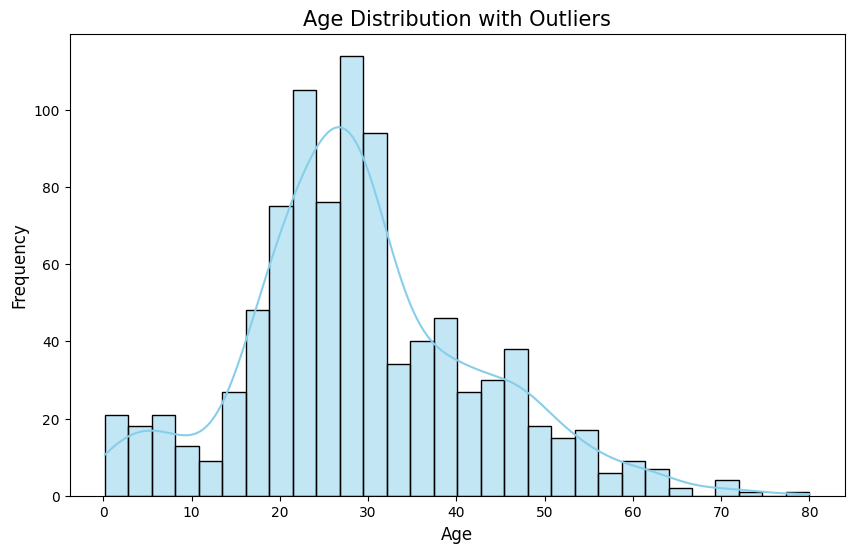

In [139]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution with Outliers", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


In [140]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(train['Age'].dropna())

# Define the threshold for outliers
threshold = 3

# Get outliers (age values with z-score > 3 or < -3)
outliers_z = train[(z_scores > threshold) | (z_scores < -threshold)]

# Display the outliers
print(outliers_z[['Age']])


      Age
362  74.0
432  71.0
498  70.0
551  80.0
895  70.0
896  71.0


##### fare

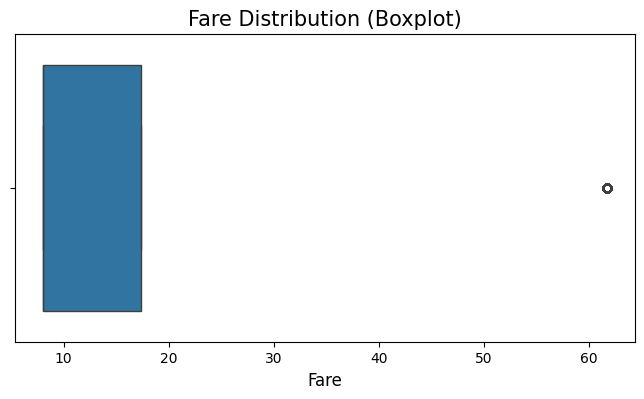

In [142]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Fare'])
plt.title("Fare Distribution (Boxplot)", fontsize=15)
plt.xlabel("Fare", fontsize=12)
plt.show()


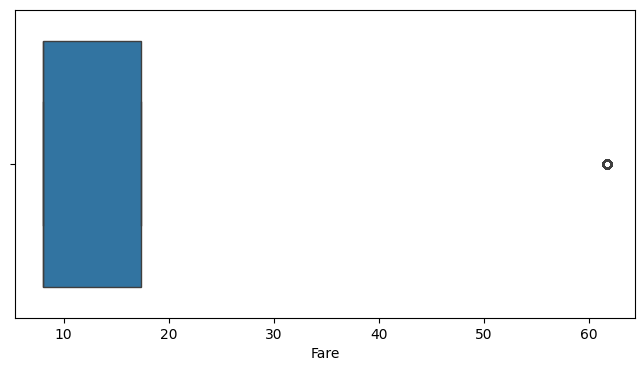

In [143]:
# looking inside Fare variable boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Fare'])
plt.show()

Treating outliers didn’t improve the model; instead, it worsened the predictions. Since our model can handle outliers well, I decided to leave them as they are. Furthermore, I will create **Age Bins** and **Fare Bins** to help improve accuracy.

#### How many passengers survived?

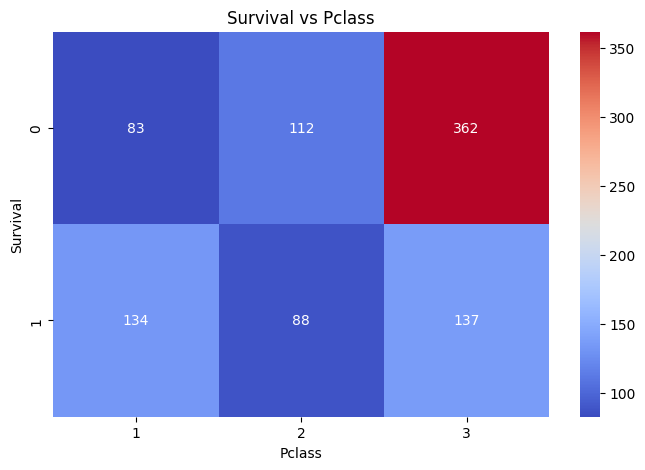

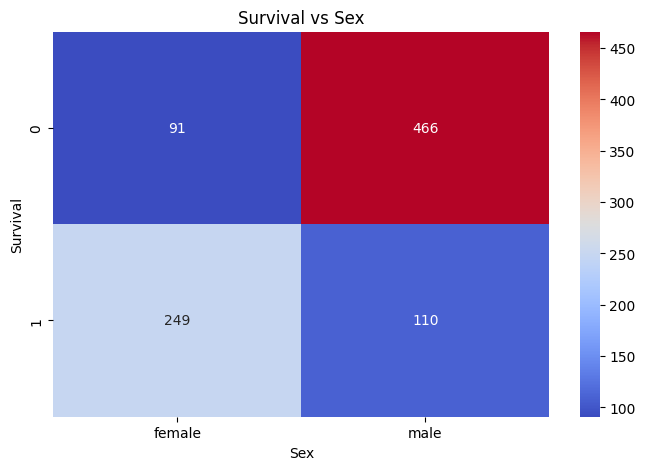

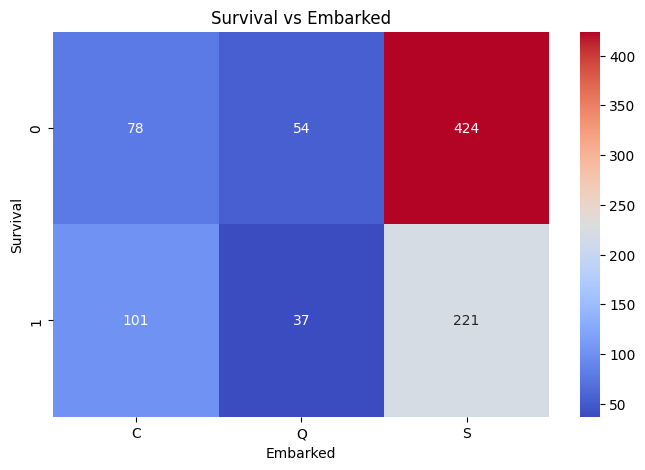

In [146]:

pivot_pclass = pd.pivot_table(train, index='Survival', columns='Pclass', values='Ticket', aggfunc='count')
pivot_sex = pd.pivot_table(train, index='Survival', columns='Sex', values='Ticket', aggfunc='count')
pivot_embarked = pd.pivot_table(train, index='Survival', columns='Embarked', values='Ticket', aggfunc='count')

# Plot heatmaps
plt.figure(figsize=(8,5))
sns.heatmap(pivot_pclass, annot=True, cmap="coolwarm", fmt="d")
plt.title("Survival vs Pclass")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(pivot_sex, annot=True, cmap="coolwarm", fmt="d")
plt.title("Survival vs Sex")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(pivot_embarked, annot=True, cmap="coolwarm", fmt="d")
plt.title("Survival vs Embarked")
plt.show()


#### Calculate the number of survivors

In [148]:
survived_count = train['Survival'].sum()

# Calculate the survival rate
survival_rate = survived_count / len(train) * 100

print(f"Number of survivors: {survived_count}")
print(f"Survival rate: {survival_rate:.2f}%")


Number of survivors: 359
Survival rate: 39.19%


##### Plot 

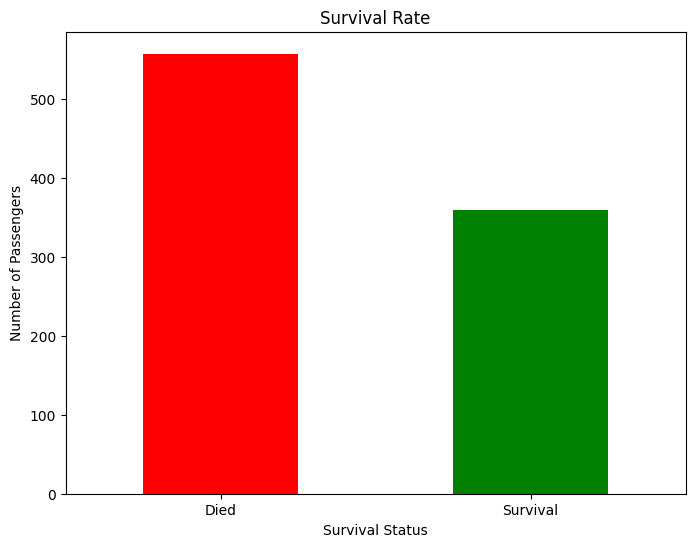

In [150]:

# Function to plot bar chart for survival rate
def plot_survival_rate(df):
    survival_count = df['Survival'].value_counts()
    survival_count.index = ['Died', 'Survival']
    survival_count.plot(kind='bar', color=['red', 'green'], figsize=(8, 6))
    plt.title('Survival Rate')
    plt.xlabel('Survival Status')
    plt.ylabel('Number of Passengers')
    plt.xticks(rotation=0)
    plt.show()

# Plot the survival rate for the train dataset
plot_survival_rate(train)


#### Survival rate by gender

In [152]:
# Count passengers by gender
gender_count = train['Sex'].value_counts()
print(gender_count)

# Calculate survival rate for each gender
survival_by_gender = train.groupby('Sex')['Survival'].mean()
print(survival_by_gender)


Sex
male      576
female    340
Name: count, dtype: int64
Sex
female    0.732353
male      0.190972
Name: Survival, dtype: float64


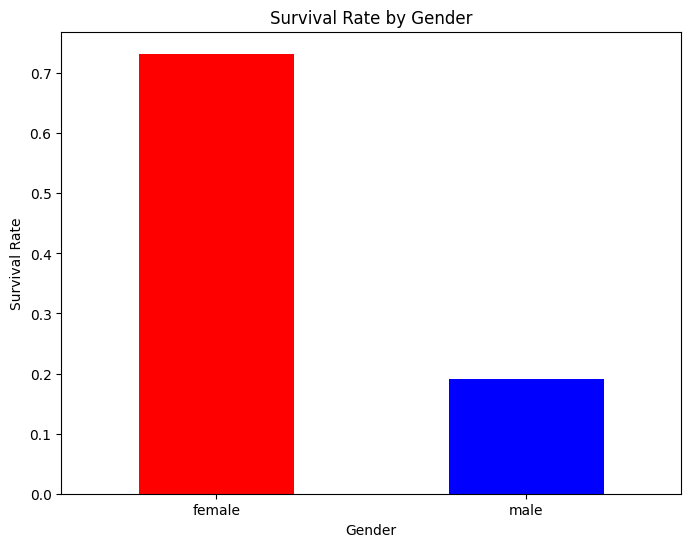

In [153]:
# plot survival rate by gender
def plot_survival_by_gender(df):
    survival_by_gender = df.groupby('Sex')['Survival'].mean()
    survival_by_gender.plot(kind='bar', color=['red', 'blue'], figsize=(8, 6))
    plt.title('Survival Rate by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=0)
    plt.show()
plot_survival_by_gender(train)


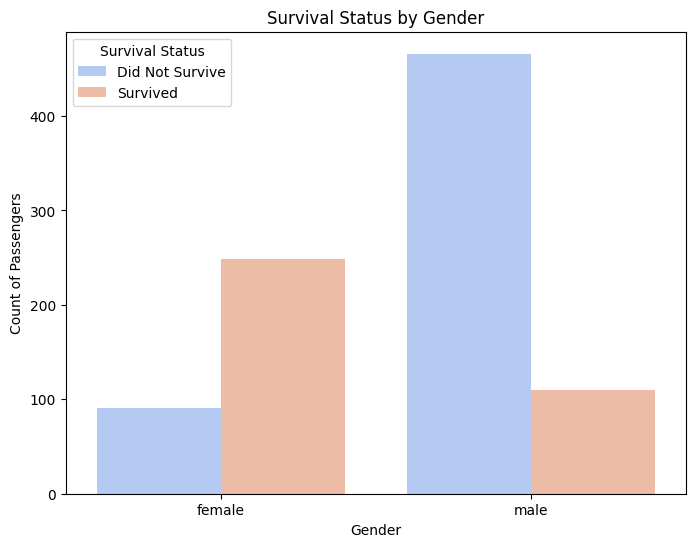

In [154]:
# Function to plot count plot based on gender and survival status
def plot_survival_count_by_gender(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sex', hue='Survival', data=df, palette='coolwarm')
    plt.title('Survival Status by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count of Passengers')
    plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
    plt.show()

# Plot the survival count by gender
plot_survival_count_by_gender(train)


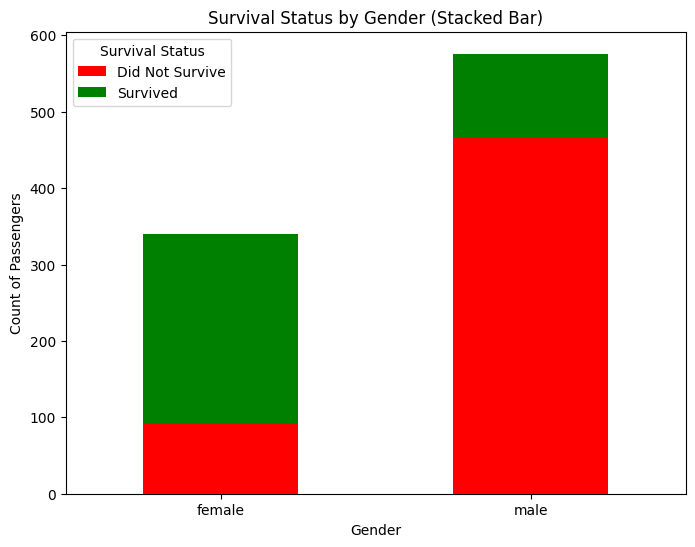

In [155]:
# Function to plot stacked bar chart based on gender and survival status 
def plot_stacked_bar_chart(df):
    # Create a pivot table for survival status based on gender
    survival_by_gender = df.pivot_table(index='Sex', columns='Survival', aggfunc='size', fill_value=0)
    
    # Plot the stacked bar chart
    survival_by_gender.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6))
    
    # Adding titles and labels
    plt.title('Survival Status by Gender (Stacked Bar)')
    plt.xlabel('Gender')
    plt.ylabel('Count of Passengers')
    plt.xticks(rotation=0)
    plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
    plt.show()

# Plot the stacked bar chart based on gender and survival status
plot_stacked_bar_chart(train)


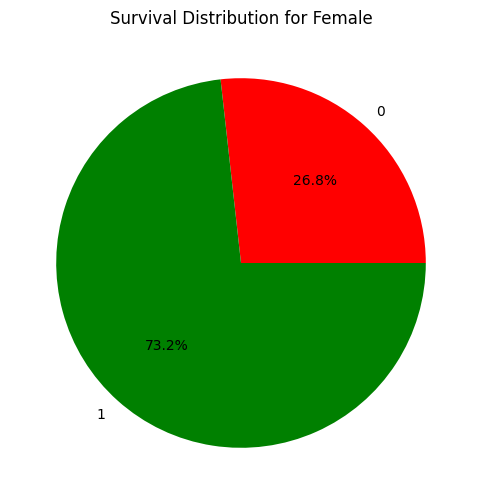

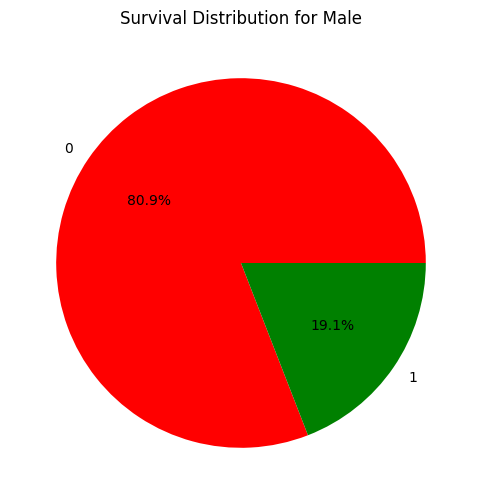

In [156]:
# Function to plot pie chart based on gender and survival status
def plot_pie_chart(df):
    # Count the number of survivors and non-survivors by gender
    survival_by_gender = df.groupby(['Sex', 'Survival']).size().unstack()
    
    # Plot pie charts for each gender
    gender_groups = survival_by_gender.index
    for gender in gender_groups:
        plt.figure(figsize=(6, 6))
        survival_by_gender.loc[gender].plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
        plt.title(f'Survival Distribution for {gender.capitalize()}')
        plt.ylabel('')  # Remove the 'ylabel' to avoid clutter
        plt.show()

# Plot pie charts for survival distribution by gender
plot_pie_chart(train)


#### Interpretation of the Results:



##### Passenger Count:
The majority of passengers were male, but there were still a significant number of female passengers.

##### Survival Rate by Gender:

- **Women**: The survival rate for women was significantly higher than for men. 

- **Men**: The survival rate for men was much lower, which likely reflects the social practice of "women and children first" during the Titanic disaster.


#### Does the socio-economic class of a passenger have an impact on their likelihood of survival?

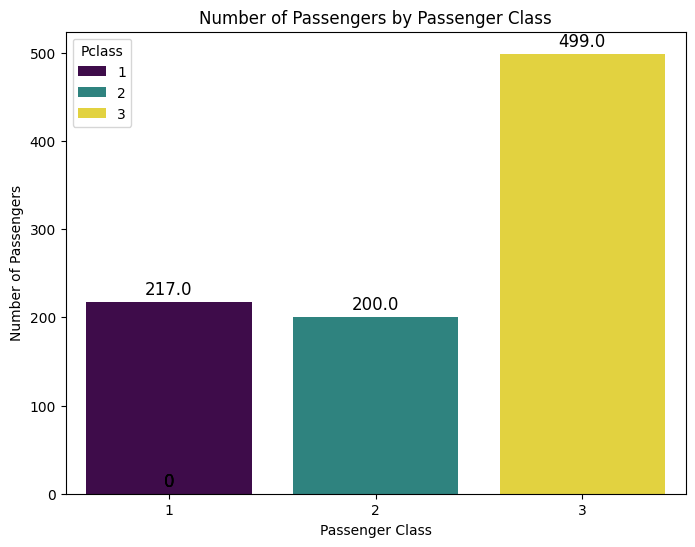

In [160]:
# Function to plot the count of passengers per class and show numbers on the bars
def plot_class_count_with_numbers(df):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Pclass', data=df, hue='Pclass', palette='viridis') 

    # Add numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 9), textcoords='offset points')
    plt.title('Number of Passengers by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.show()


plot_class_count_with_numbers(train)


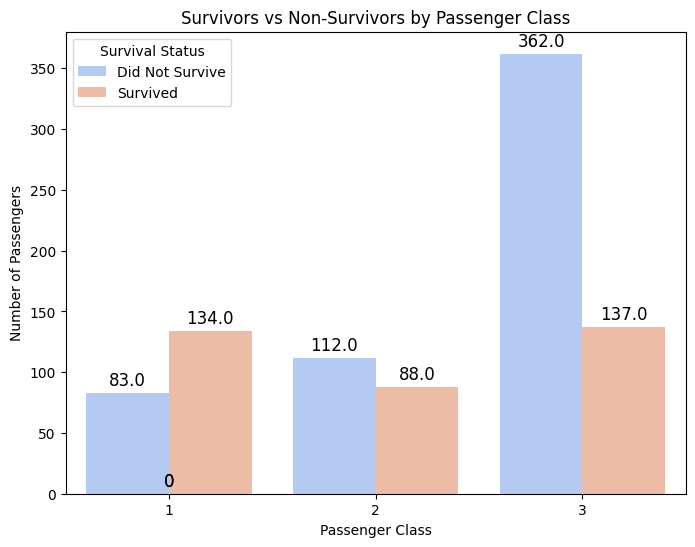

In [161]:
# Function to plot the count of survivors and non-survivors per class and show numbers on the bars
def plot_class_survival_comparison(df):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Pclass', hue='Survival', data=train, palette='coolwarm')

    # Add numbers on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 9), textcoords='offset points')
    plt.title('Survivors vs Non-Survivors by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
    plt.show()

# Call the function to plot the comparison
plot_class_survival_comparison(train)


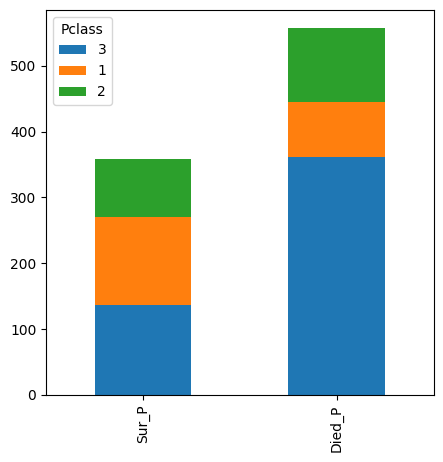

In [162]:

def bar_chart_stacked(dataset, feature, stacked = True):
    survived = dataset[dataset['Survival']==1][feature].value_counts()
    dead = dataset[dataset['Survival']==0][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived,dead])
    df_survived_dead.index = ['Sur_P','Died_P']
    ax = df_survived_dead.plot(kind='bar',stacked=stacked, figsize=(5,5))

bar_chart_stacked(train, 'Pclass')

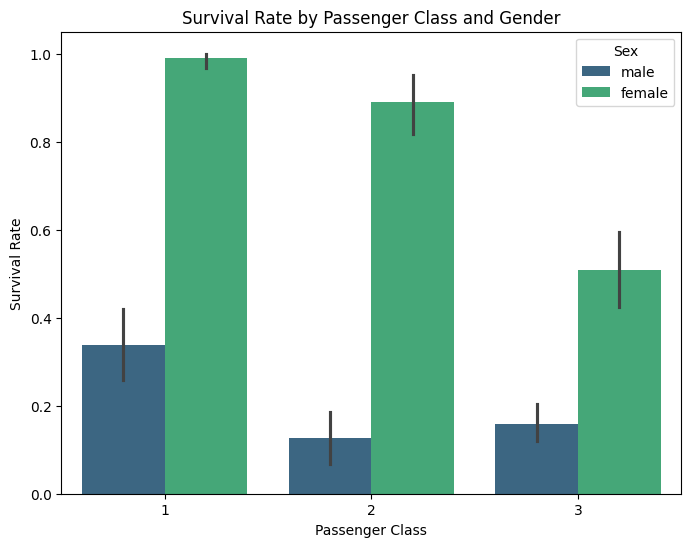

In [163]:
# Function to plot the survival rate based on passenger class
def plot_class_survival(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Pclass', y='Survival', data=df, hue='Sex', palette='viridis') 
    plt.title('Survival Rate by Passenger Class and Gender')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()
plot_class_survival(train)


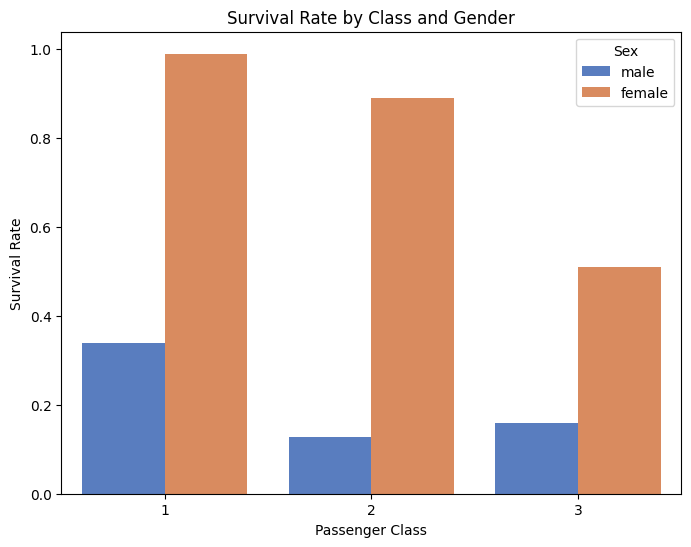

In [164]:
# Grouped bar plot to explore interaction between Pclass and Sex
def plot_class_gender_interaction(df):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Pclass', hue='Sex', y='Survival', data=df, errorbar=None, palette='muted')  
    plt.title('Survival Rate by Class and Gender')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.show()
plot_class_gender_interaction(train)


 #####  As it seems it has influence on survival factor and women in high class had more chance to be survived

#### Is the increased survival rate in Class 1 attributable to the class status, or is it mainly because women dominate this class?

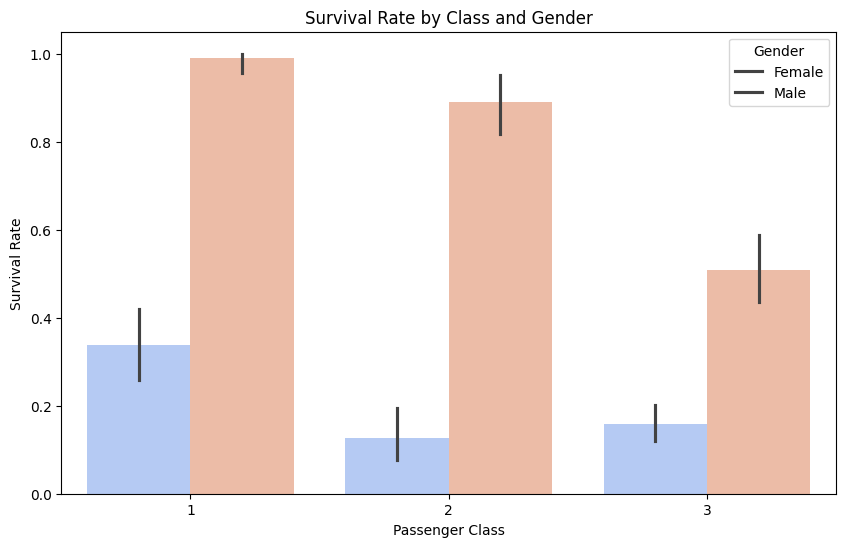

In [167]:
# Plot survival rate by Pclass and Sex
def plot_survival_by_class_and_gender(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Pclass', hue='Sex', y='Survival', data=df, palette='coolwarm')

    plt.title('Survival Rate by Class and Gender')
    plt.xlabel('Passenger Class')
    plt.ylabel('Survival Rate')
    plt.legend(title='Gender', labels=['Female', 'Male'])
    plt.show()
plot_survival_by_class_and_gender(train)


In [168]:

# Calculate the survival percentage by gender and passenger class
def survival_percentage_by_gender_and_class(df):
    # Grouping by 'Sex' and 'Pclass', then calculating the mean survival rate (percentage)
    survival_by_gender_class = df.groupby(['Sex', 'Pclass'])['Survival'].mean() * 100
    print(survival_by_gender_class)

survival_percentage_by_gender_and_class(train)


Sex     Pclass
female  1         98.924731
        2         89.024390
        3         50.909091
male    1         33.870968
        2         12.711864
        3         15.868263
Name: Survival, dtype: float64


#####
The analysis confirms the earlier hypothesis. Regardless of the class, **gender** appears to be the most crucial factor when it comes to survival (at least in comparison to the **Pclass** feature). However, it's noteworthy that **men** had a significantly higher chance of survival if they held tickets for **Class 1**. This indicates that both **gender** and **class** provide valuable and complementary insights, and both features should be retained for the model.

##### Key observations:

- **Survival Rate for Females**:
  - **Class 1**: 96.8%
  - **Class 2**: 92.1%
  - **Class 3**: 50%

- **Survival Rate for Males**:
  - **Class 1**: 36.8% 
    (still significantly lower than the survival rate for females in **Class 3**)



#### Did a passengers age influence the chance of survival?

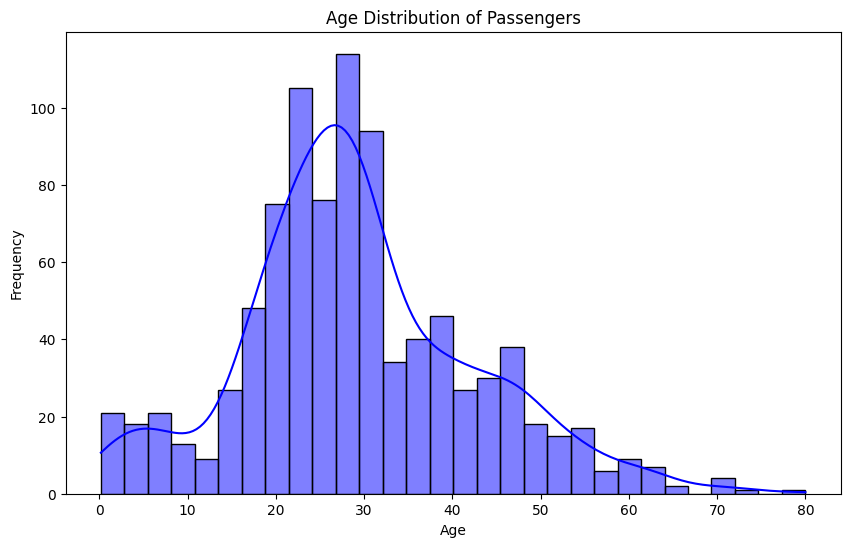

In [171]:
def plot_age_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='blue')
    plt.title('Age Distribution of Passengers')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

plot_age_distribution(train)


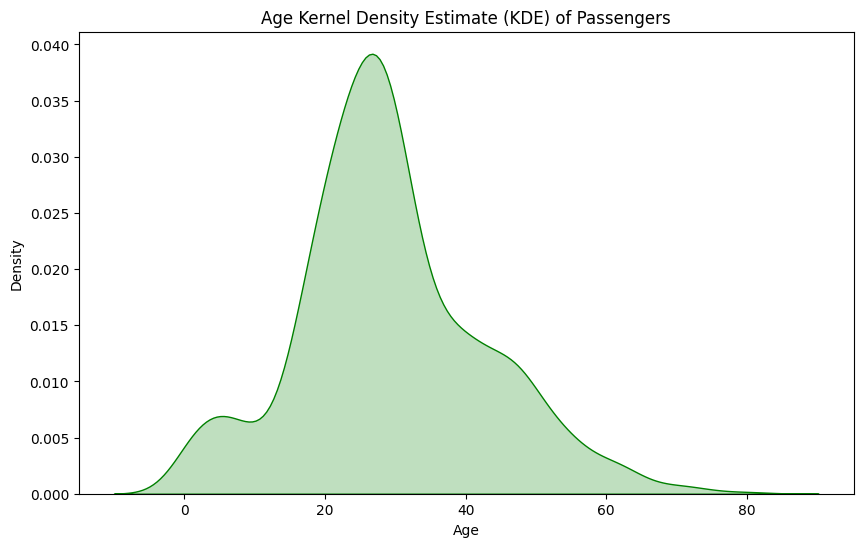

In [172]:
def plot_age_kde(df):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['Age'].dropna(), fill=True, color='green')  # Use fill=True instead of shade=True
    plt.title('Age Kernel Density Estimate (KDE) of Passengers')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.show()

plot_age_kde(train)


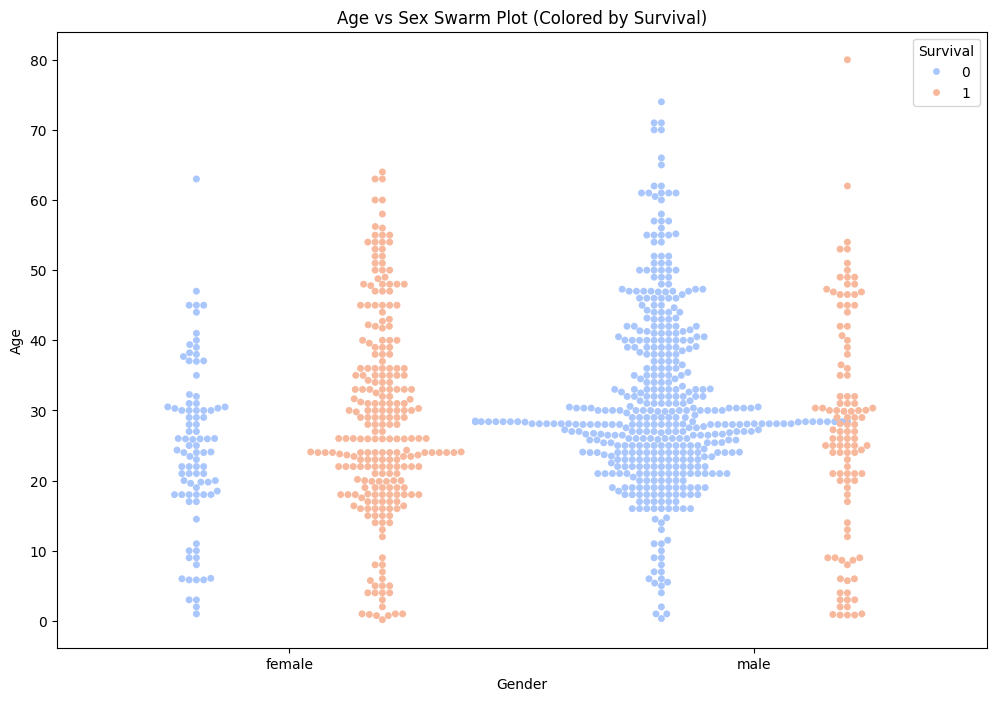

In [173]:
def plot_age_sex_swarm(df):
    plt.figure(figsize=(12, 8))
    sns.swarmplot(x='Sex', y='Age', hue='Survival', data=df, palette='coolwarm', dodge=True)
    plt.title('Age vs Sex Swarm Plot (Colored by Survival)')
    plt.xlabel('Gender')
    plt.ylabel('Age')
    plt.show()

plot_age_sex_swarm(train)


In [174]:
print(train.columns) 



Index(['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')


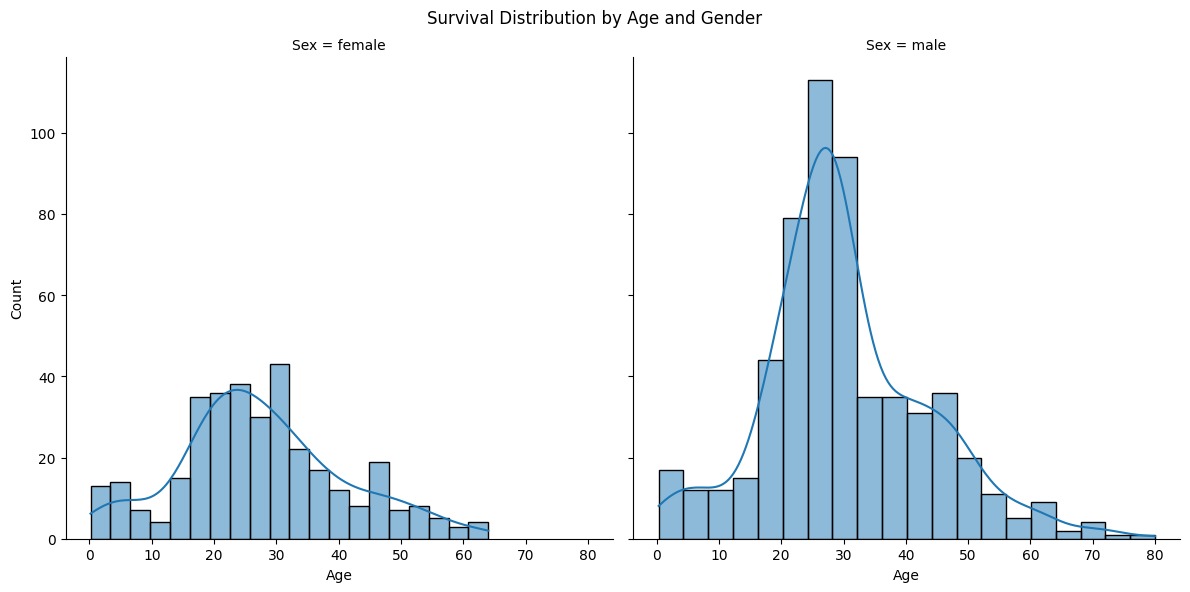

In [175]:
def plot_survival_by_age_gender(df):
    sns.FacetGrid(df, col="Sex", height=6).map(sns.histplot, "Age", kde=True, bins=20)
    plt.subplots_adjust(top=0.9)
    plt.suptitle("Survival Distribution by Age and Gender")
    plt.show()

plot_survival_by_age_gender(train)


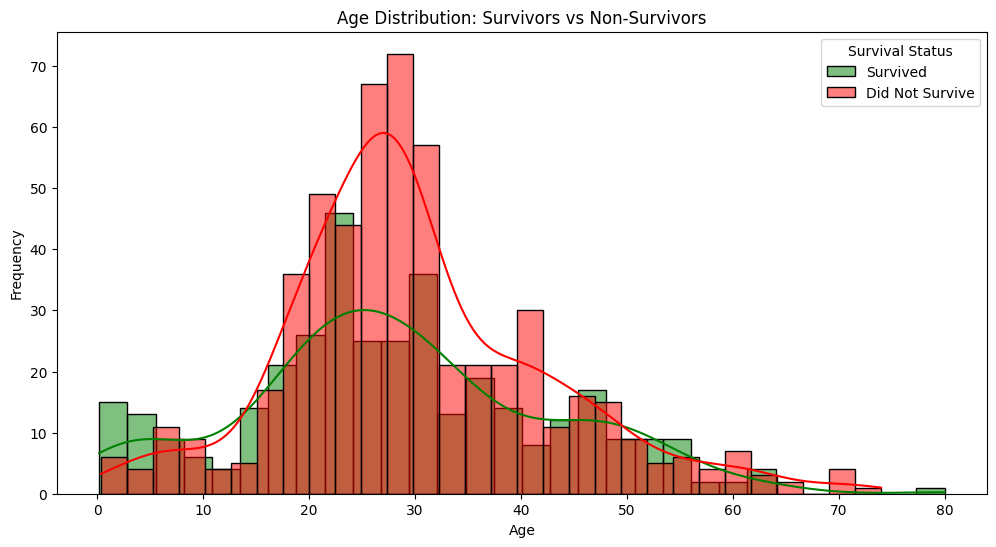

In [176]:
# Function to plot age distribution for survivors vs non-survivors
def plot_age_distribution_survival(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[df['Survival'] == 1]['Age'].dropna(), kde=True, bins=30, color='green', label='Survived')
    sns.histplot(df[df['Survival'] == 0]['Age'].dropna(), kde=True, bins=30, color='red', label='Did Not Survive')
    
    plt.title('Age Distribution: Survivors vs Non-Survivors')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend(title='Survival Status')
    plt.show()


plot_age_distribution_survival(train)


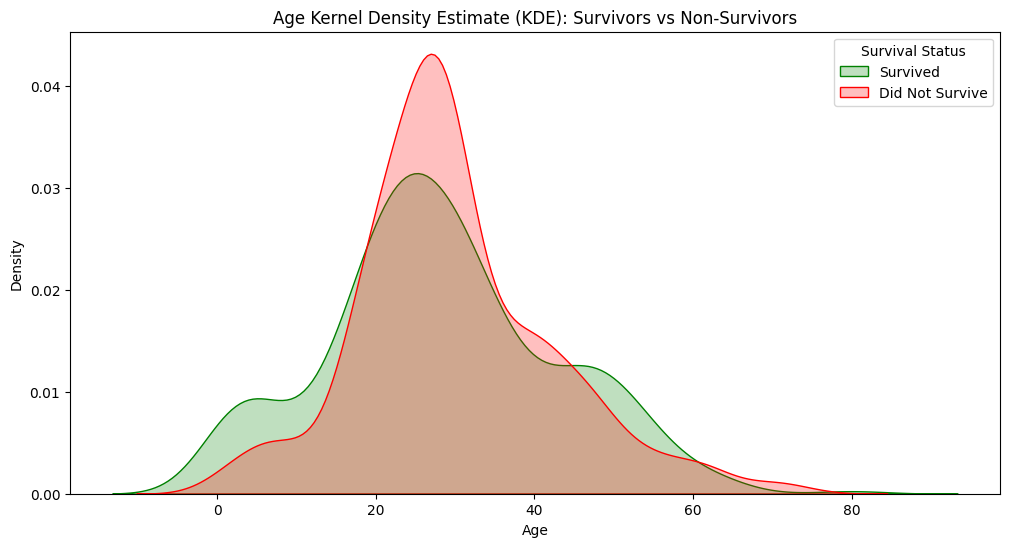

In [177]:
# Function to plot KDE of age for survivors vs non-survivors
def plot_age_kde_survival(df):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df[df['Survival'] == 1]['Age'].dropna(), fill=True, color='green', label='Survived')  # Use fill=True
    sns.kdeplot(df[df['Survival'] == 0]['Age'].dropna(), fill=True, color='red', label='Did Not Survive')  # Use fill=True
    
    plt.title('Age Kernel Density Estimate (KDE): Survivors vs Non-Survivors')
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend(title='Survival Status')
    plt.show()

# Plot the age KDE for survivors vs non-survivors
plot_age_kde_survival(train)


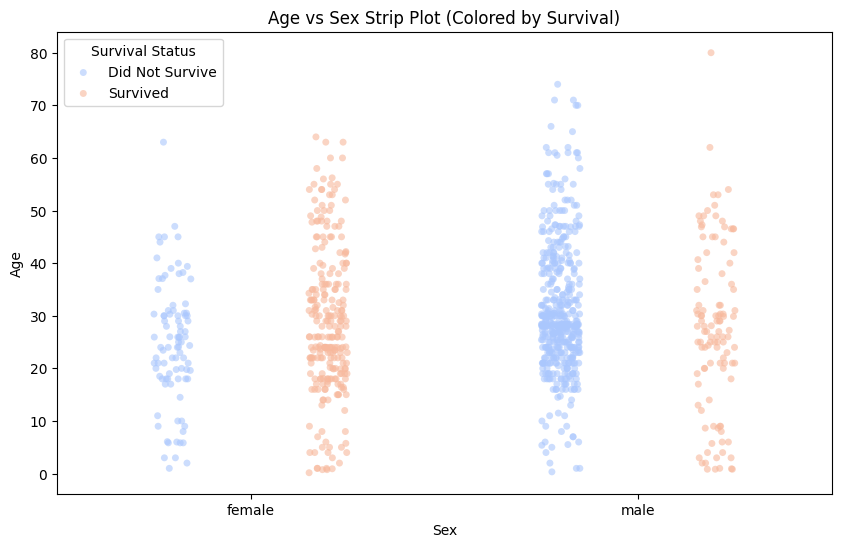

In [178]:
# Function for creating the Age vs Sex Strip Plot (Alternative to Swarm Plot)
def plot_age_vs_sex_strip(df):
    plt.figure(figsize=(10, 6))
    sns.stripplot(x='Sex', y='Age', data=df, hue='Survival', palette='coolwarm', dodge=True, jitter=True, alpha=0.6)

    # Adding titles and labels
    plt.title('Age vs Sex Strip Plot (Colored by Survival)')
    plt.xlabel('Sex')
    plt.ylabel('Age')
    plt.legend(title='Survival Status', labels=['Did Not Survive', 'Survived'])
    plt.show()

# Plot the Age vs Sex Strip Plot
plot_age_vs_sex_strip(train)


C:\Users\AdminR\anaconda3\envs\new_env\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


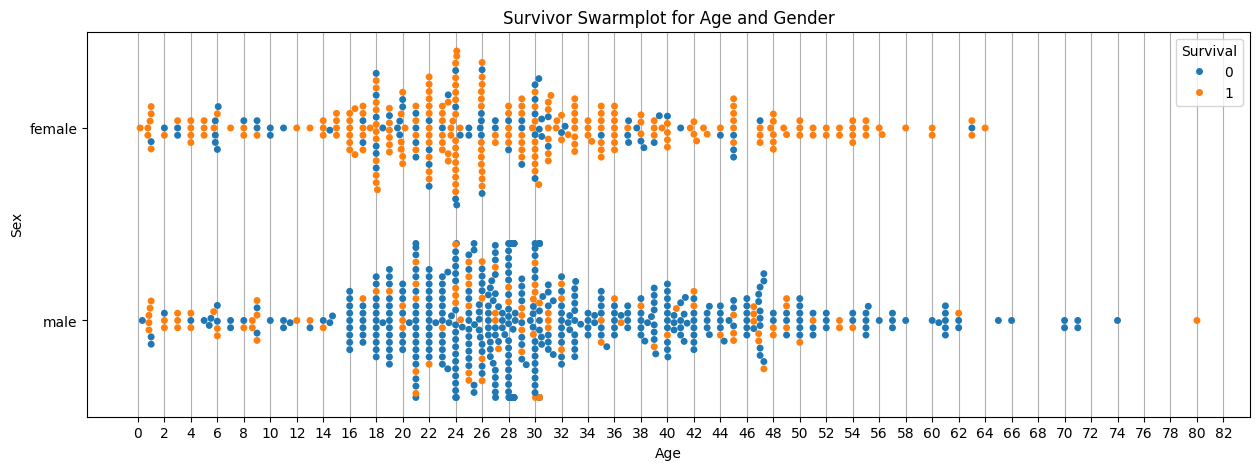

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_swarm_survivors(dataset, feature1, feature2, title, fize=(15, 5)):
    # Create figure
    fig, ax = plt.subplots(figsize=fize)
    ax.grid(True)
    
    # Set x-ticks
    plt.xticks(list(range(0, 100, 2)))

    # Use dataset instead of train_df
    sns.swarmplot(y=feature1, x=feature2, hue='Survival', data=dataset).set_title(title)

    plt.show()

# Call function with correct dataset
plot_swarm_survivors(train, "Sex", "Age", "Survivor Swarmplot for Age and Gender")


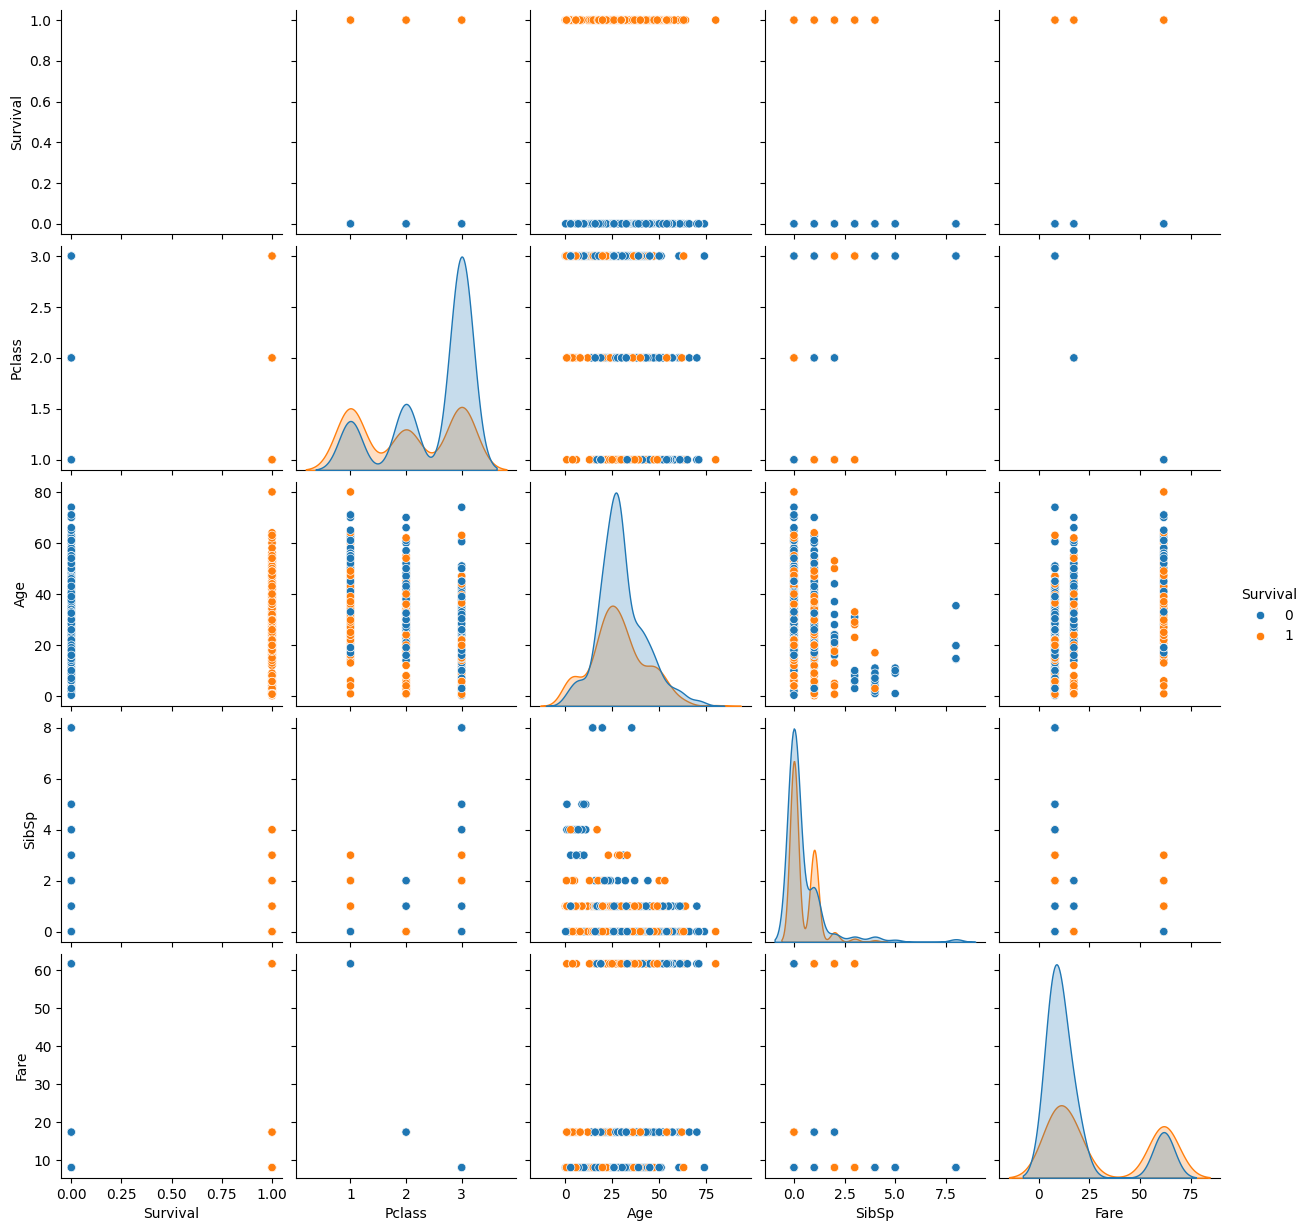

In [180]:
sns.pairplot(train, vars=["Survival", "Pclass", "Age", "SibSp", "Fare"], hue="Survival", diag_kind="kde")
plt.show()

<p1> Age does seem to have an influence on survival. The younger passengers, particularly those under the age of 12, had a much higher survival rate.

Gender plays a crucial role in survival, especially for females in Class 1.

The oldest survivor, an 80-year-old male, survived, showing that age alone isn't a definitive factor.

Class 1 passengers had a better survival rate overall, regardless of age or gender, but the skewed gender distribution makes it more complicated to disentangle the true effect of class on survival.

These visualizations and analyses suggest that both age and gender interacted in determining survival, with gender being the most significant factor in the overall survival rate. However, class also played a significant role in survival chances.

#### Conclusion:



**Age:** Younger passengers, especially those under 12, had a higher survival rate. However, age alone didn’t guarantee survival, as an 80-year-old male also survived.
  
**Gender:** Gender played a significant role, with females having a higher survival rate, especially in Class 1.

 **Class:** Passengers in **Class 1** had a better survival rate overall, but gender distribution made it hard to fully understand the impact of class.

 **Interaction:** Age and gender worked together to influence survival, with gender being the most significant factor, followed by class.

These findings suggest that survival was influenced by a combination of age, gender, and class.

<h3> Did paying the ticket price influence the chance of survival?

In [185]:
train.Fare.describe()



count    916.000000
mean      22.790760
std       21.990193
min        8.050000
25%        8.050000
50%        8.050000
75%       17.375000
max       61.679200
Name: Fare, dtype: float64

In [186]:
print(train["Fare"].values)  # Prints as a NumPy array


[ 8.05   61.6792  8.05   61.6792 17.375  61.6792  8.05    8.05    8.05
 61.6792 61.6792  8.05    8.05    8.05   17.375   8.05   61.6792 17.375
 17.375   8.05   61.6792  8.05   17.375  61.6792 61.6792 61.6792  8.05
  8.05   61.6792 17.375   8.05   17.375   8.05   61.6792 61.6792 61.6792
 61.6792  8.05    8.05   17.375  61.6792  8.05    8.05    8.05    8.05
  8.05    8.05    8.05    8.05    8.05   61.6792 61.6792  8.05    8.05
  8.05   61.6792  8.05    8.05    8.05   61.6792 61.6792 61.6792 61.6792
 17.375   8.05    8.05   61.6792  8.05    8.05    8.05   61.6792 17.375
  8.05    8.05    8.05   61.6792  8.05   61.6792  8.05   17.375   8.05
  8.05    8.05   17.375  61.6792  8.05    8.05    8.05   17.375   8.05
  8.05    8.05   61.6792 61.6792 61.6792  8.05   61.6792  8.05   17.375
  8.05   61.6792  8.05   61.6792 17.375  61.6792 61.6792  8.05    8.05
 17.375  17.375  61.6792  8.05    8.05   17.375  17.375   8.05    8.05
 61.6792 61.6792 17.375   8.05   17.375   8.05   17.375   8.05   61.67

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(dataset, feature, title, bins=30, hist=True, fsize=(5, 5)):
    fig, ax = plt.subplots(figsize=fsize)
    ax.set_title(title)
    
    # Use histplot instead of distplot
    sns.histplot(dataset[feature], color='g', bins=bins, kde=hist, ax=ax)  # Add kde=True if you want a kernel density estimate
    
    plt.show()




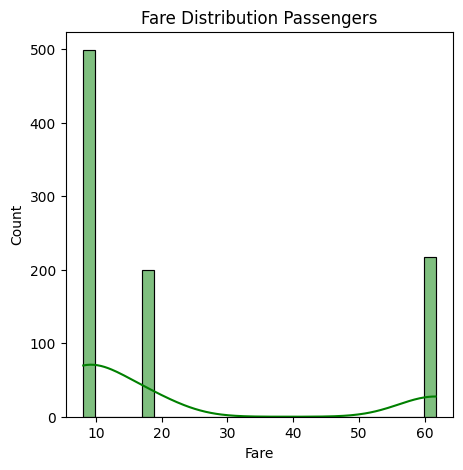

In [188]:
plot_distribution(train, "Fare", "Fare Distribution Passengers")

The Fare feature is highly skewed, with most passengers paying low fares, and it could be challenging to visualize its impact on survival due to its wide range. To address this, we can categorize Fare into bins (e.g., low, medium, high) and then plot these categories against survival rates. This will make the visualization more interpretable and allow us to better understand the relationship between fare and survival.

#### Embarkation 

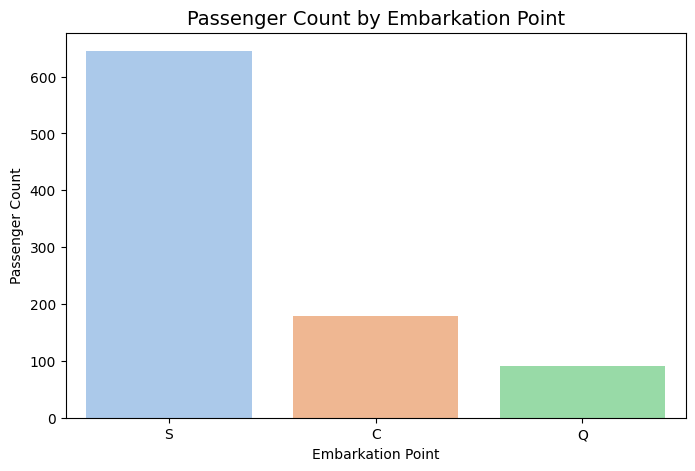

In [192]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", data=train, hue="Embarked", palette="pastel", legend=False)
plt.title("Passenger Count by Embarkation Point", fontsize=14)
plt.xlabel("Embarkation Point")
plt.ylabel("Passenger Count")
plt.show()


<p1> he majority of passengers embarked from Southampton (S).

A smaller portion embarked from Cherbourg (C) and Queenstown (Q).

<h4>  Survival Rate by Embarkation Point </h4>

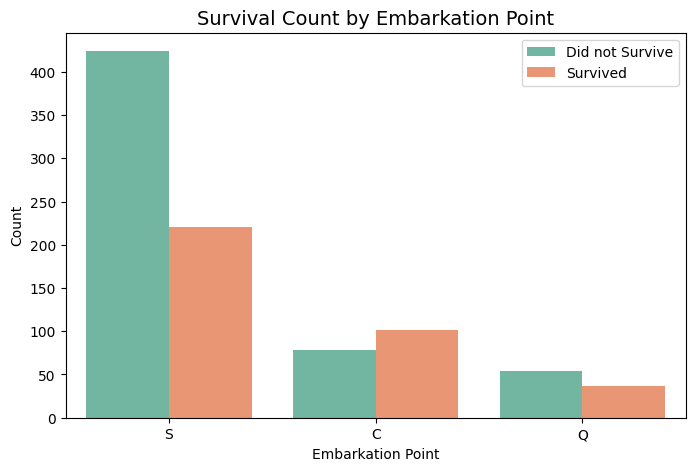

In [195]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Survival", data=train, palette="Set2")
plt.title("Survival Count by Embarkation Point", fontsize=14)
plt.xlabel("Embarkation Point")
plt.ylabel("Count")
plt.legend(["Did not Survive", "Survived"])
plt.show()


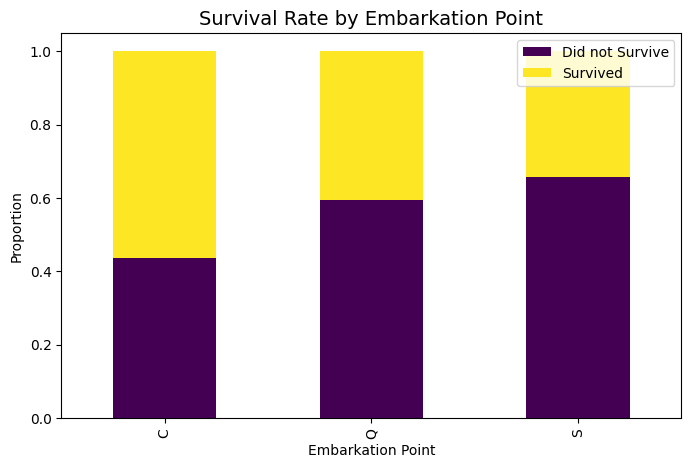

In [196]:
survival_rates = train.groupby("Embarked")["Survival"].value_counts(normalize=True).unstack()

survival_rates.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Survival Rate by Embarkation Point", fontsize=14)
plt.xlabel("Embarkation Point")
plt.ylabel("Proportion")
plt.legend(["Did not Survive", "Survived"])
plt.show()


####  Why is the Likelihood of Survival Higher at Cherbourg? </h3>

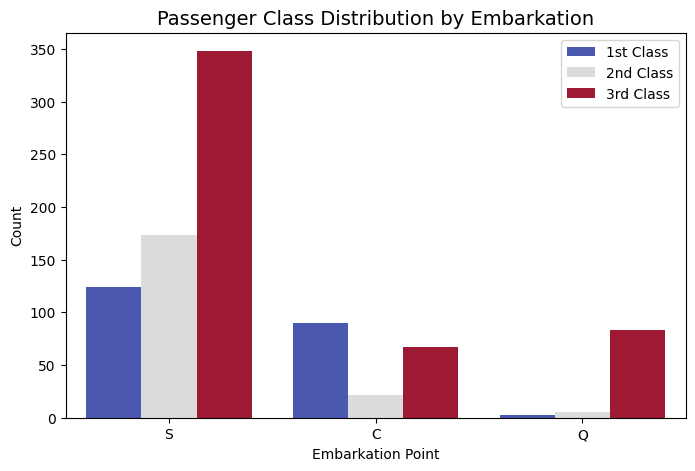

In [198]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Pclass", data=train, palette="coolwarm")
plt.title("Passenger Class Distribution by Embarkation", fontsize=14)
plt.xlabel("Embarkation Point")
plt.ylabel("Count")
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()


<h4> Analyze Embarked</h4>

From our previous analysis, we saw that Cherbourg had the highest survival rate , while Southampton had the lowest . Since first-class passengers had a much higher survival rate, the logical next step is to check whether Cherbourg had a disproportionately high number of first-class passengers.

In [202]:

# Function to show a countplot for a single feature
def show_countplot(dataset, feature, title, fsize = (5,5)):
    fig, ax = plt.subplots(figsize=fsize)
    sns.countplot(dataset[feature], ax=ax).set_title(title)
    plt.show()  # Display the plot
    
# Function to show a countplot comparing two features
def show_compare_countplot(dataset, feature1, feature2, title):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.countplot(x = feature1, hue = feature2, data = dataset, ax=ax).set_title(title)
    plt.show() 




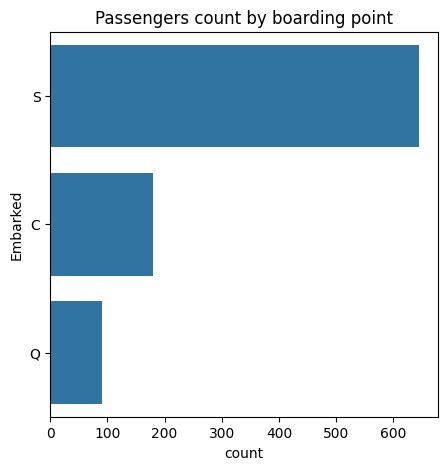

In [203]:
show_countplot(train, "Embarked", 'Passengers count by boarding point')

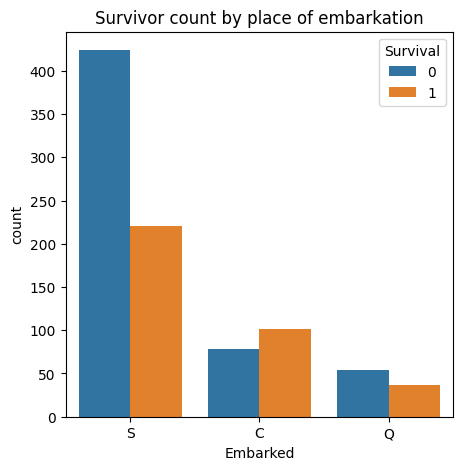

In [204]:
show_compare_countplot(train, "Embarked", "Survival", "Survivor count by place of embarkation")

<h5> Count Plot of Survivors by Embarkation and Class </h5>
<P1> This plot shows how many first-class, second-class, and third-class passengers survived from each embarkation point.

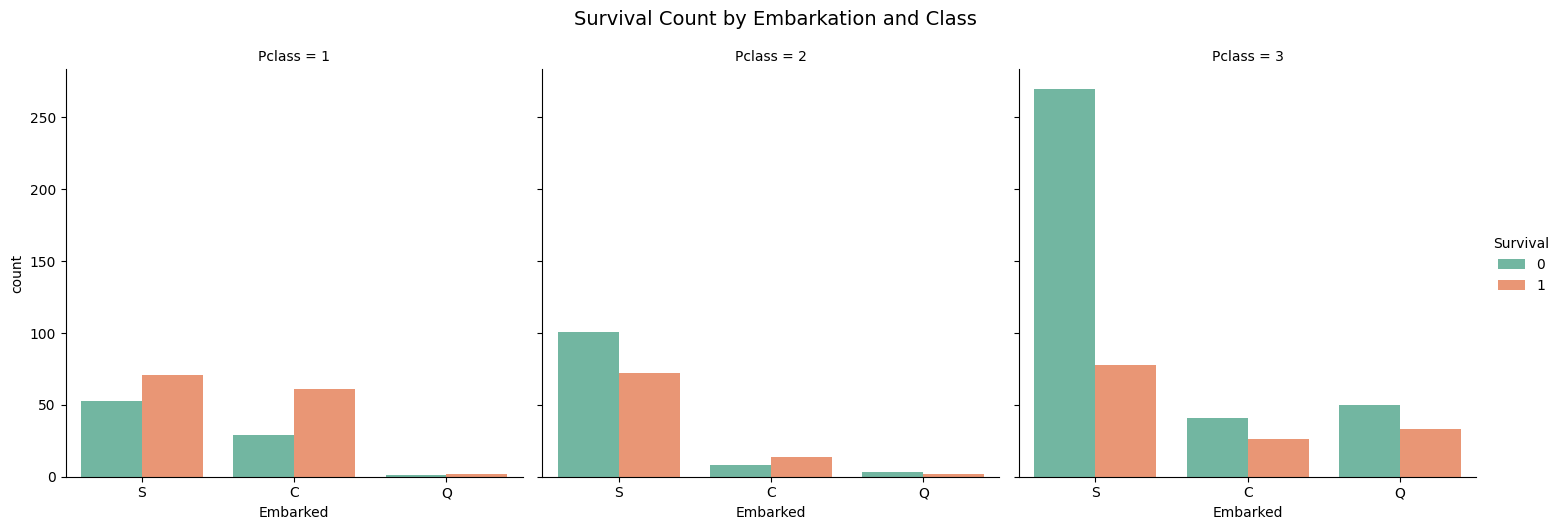

In [206]:
sns.catplot(x="Embarked", hue="Survival", col="Pclass", data=train, kind="count", palette="Set2", height=5, aspect=1)
plt.suptitle("Survival Count by Embarkation and Class", y=1.05, fontsize=14)
plt.show()


First-class passengers from Cherbourg had the highest survival rate.

Southampton had a high number of third-class passengers, leading to a lower overall survival rate.

Queenstown had almost all third-class passengers, yet their survival rate was slightly higher than Southampton.

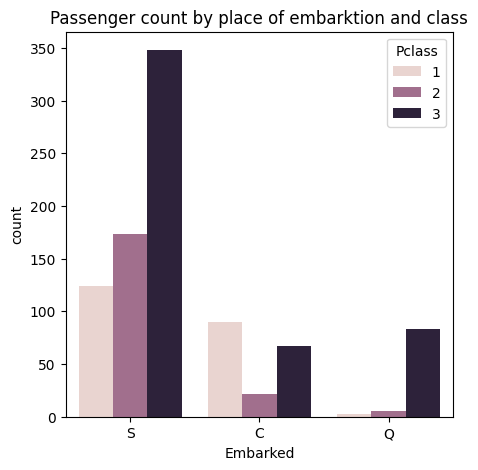

In [208]:
show_compare_countplot(train, "Embarked", "Pclass", "Passenger count by place of embarktion and class")


The majority embarked at Cherbourg were 1. class passengers.
The majority embarked at Southampton were 3. class passengers.
However, it does not explain why the survival rate at Queenstown is slightly higher than at Southampton even though the number of 1. class passenger concerning 3. class passengers is higher at Southampton.

One hypothesis is that maybe the ratio between male and female passengers differs:

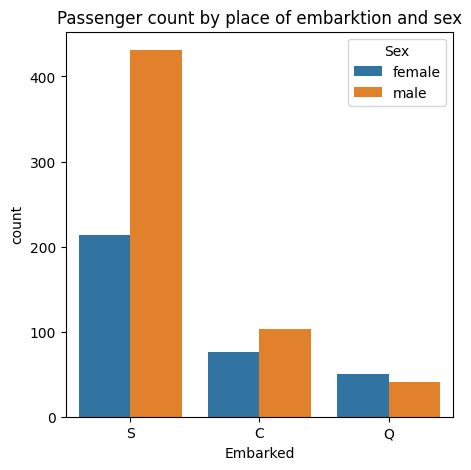

In [210]:
show_compare_countplot(train, "Embarked", "Sex", "Passenger count by place of embarktion and sex")

#### Why is the Survival Rate at Queenstown Higher than Southampton?
</h4>
<P1>Even though Southampton had more first-class passengers than Queenstown, Queenstown’s survival rate was slightly higher.

Possible Explanation: Gender Ratio Differences
Since women had a much higher survival rate than men, we should check the male-to-female ratio for each embarkation point</P1>

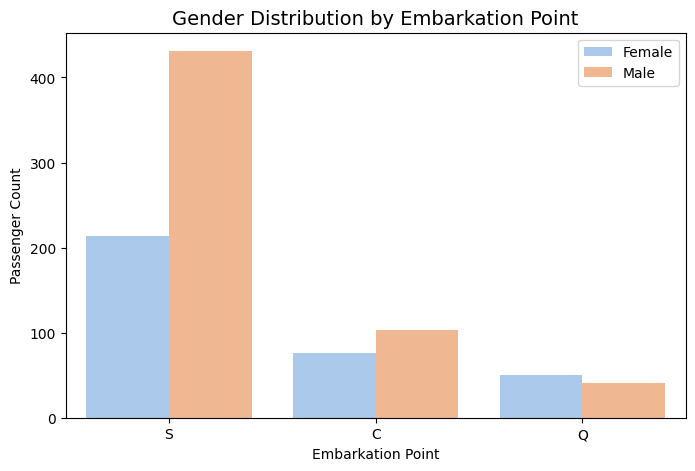

In [212]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", hue="Sex", data=train, palette="pastel")
plt.title("Gender Distribution by Embarkation Point", fontsize=14)
plt.xlabel("Embarkation Point")
plt.ylabel("Passenger Count")
plt.legend(["Female", "Male"])
plt.show()


As expected twice as many male passengers embarked from Southam were roughly the same number of male and female passengers embarked from Queenstown. This just shows the importance of the Sex feature.

##### Conclusion:
<p> 📌 The place of embarkation does correlate with survival rate, but the real influencing factor is passenger class.
<P></P>📌 Cherbourg had a higher proportion of first-class passengers, which explains its higher survival rate.
<P></P>📌 Southampton had more third-class passengers, leading to lower survival rates.
<P></P>📌 Embarkation alone does not determine survival, but it acts as an indirect indicator of socio-economic status.
- Cherbourg’s high survival rate was due to a high number of first-class passengers.
- Southampton had the most third-class passengers, leading to lower survival rates.
- Queenstown had a slightly higher survival rate than Southampton, possibly due to a higher proportion of female passengers.


### **Does the Number of Family Members on Board Influence Survival?**  

To analyze this, we will look at two features:  
- SibSp (Siblings/Spouses on Board)**  
- Parch (Parents/Children on Board)**  



### **1. Count Plot for SibSp (Siblings/Spouses on Board)**  



In [216]:

def bar_chart(dataset, feature1, feature2=None, title="Survival rate by sex and class"):
    plt.figure(figsize=[5, 5])
    plt.title(title)
    dataset['Survival'] = dataset['Survival'].astype(int)
    
    # Create the barplot
    g = sns.barplot(x=feature1, y='Survival', hue=feature2, errorbar=None, data=dataset)
    g.set_ylabel('Survival rate')
    
    plt.show()  




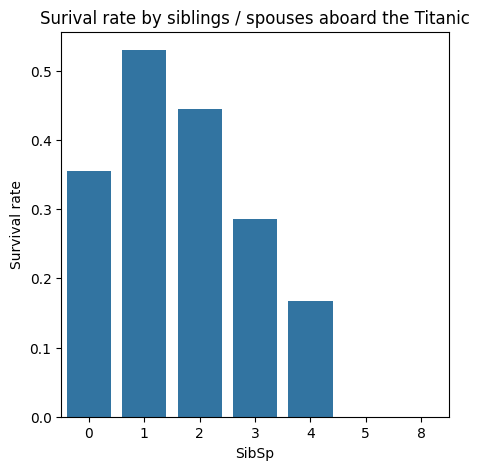

In [217]:
bar_chart(train, "SibSp", title = "Surival rate by siblings / spouses aboard the Titanic")

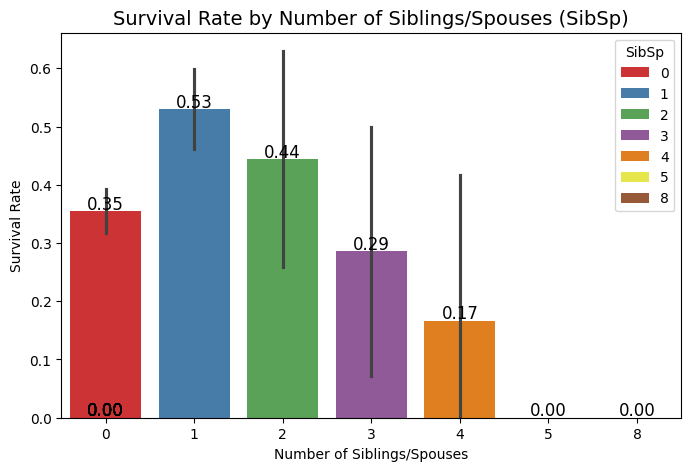

In [218]:
# For SibSp (Number of Siblings/Spouses) Survival Rate Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x="SibSp", y="Survival", data=train, hue="SibSp", palette="Set1", edgecolor="none") 
plt.title("Survival Rate by Number of Siblings/Spouses (SibSp)", fontsize=14)
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Survival Rate")

# Add survival rate labels on top of bars
for p in plt.gca().patches:
    survival_rate = p.get_height()  # Survival rate is the height of the bar
    plt.gca().annotate(f'{survival_rate:.2f}', 
                       (p.get_x() + p.get_width() / 2., survival_rate), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

plt.show()


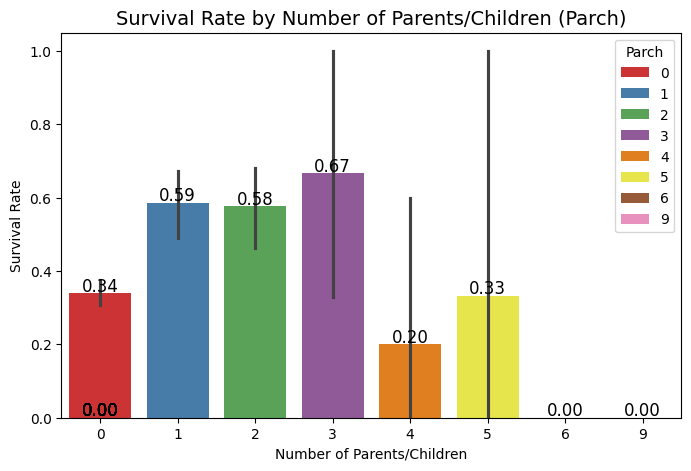

In [219]:
# For Parch (Number of Parents/Children) Survival Rate Bar Plot \
plt.figure(figsize=(8, 5))
sns.barplot(x="Parch", y="Survival", data=train, hue="Parch", palette="Set1", edgecolor="none")  
plt.title("Survival Rate by Number of Parents/Children (Parch)", fontsize=14)
plt.xlabel("Number of Parents/Children")
plt.ylabel("Survival Rate")

# Add survival rate labels on top of bars
for p in plt.gca().patches:
    survival_rate = p.get_height()  # Survival rate is the height of the bar
    plt.gca().annotate(f'{survival_rate:.2f}', 
                       (p.get_x() + p.get_width() / 2., survival_rate), 
                       ha='center', va='center', 
                       fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

plt.show()



### Conclusion:
- Traveling alone decreased survival chances.
- Small families had the highest survival rates.
- Large families had very low survival rates, likely due to evacuation challenges.
- Creating a "Family Size" feature improves survival predictions.



# 5. Feature Engineering and Data Processing

## Feature Treatments

In [223]:
train.head(20)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.000000,0,2,PP 9549,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.000000,0,0,13050,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.000000,0,0,SOTON/O.Q. 3101306,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.000000,1,0,2926,17.3750,D,S,2
5,6,1,1,"Thayer, Mr. John Borland Jr",male,17.000000,0,2,17421,61.6792,C70,C,0
6,7,3,0,"Willey, Mr. Edward",male,29.852646,0,0,S.O./P.P. 751,8.0500,G6,S,0
7,8,3,0,"Razi, Mr. Raihed",male,25.783543,0,0,2629,8.0500,G6,C,0
8,9,3,0,"Yousseff, Mr. Gerious",male,30.582191,0,0,2627,8.0500,G6,C,0
9,10,1,1,"Carter, Mr. William Ernest",male,36.000000,1,2,113760,61.6792,B96 B98,S,0


In [224]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,17.3750,D,S,2


In [225]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,2689,8.0500,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,244368,13.5000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,PC 17483,60.3896,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.5000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,8.0500,F G63,S,2


<h4> Drop 'PassengerId'</h4>
First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons' survival probability. I will not drop it from the test set, since it is required for the submission.

In [227]:
#train = train.drop(['PassengerId'], axis=1)


In [228]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,17.3750,D,S,2


In [229]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,2689,8.0500,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,244368,13.5000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,PC 17483,60.3896,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,27849,13.5000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,347072,8.0500,F G63,S,2


### Ticket

In [231]:
train['Ticket'].describe()

count          916
unique         699
top       CA. 2343
freq             7
Name: Ticket, dtype: object

<p1>
Since the 'Ticket' feature has 699 unique values, it would be very hard to convert them into any useful feature. Hence, we will drop it from the DataFrame.

In [233]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [234]:
train.head()


,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17.3750,D,S,2


In [235]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,8.0500,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,13.5000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,60.3896,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,13.5000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,8.0500,F G63,S,2


In [236]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,8.0500,F G63,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,13.5000,F2,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,60.3896,C97,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,13.5000,F4,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,8.0500,F G63,S,2


In [237]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8.0500,G6,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61.6792,C6,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8.0500,G6,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61.6792,D7,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17.3750,D,S,2


In [238]:
# train.groupby('Ticket_Prefix')['Survival'].mean()


<h3>
 Combining SibSp and Parch

<p1> SibSp and Parch would make more sense as a combined feature that shows the total number of relatives a person has on the Titanic. I will create the new feature 'relative' below, and also a value that shows if someone is not alone.

In [241]:
data = [train, test]

for dataset in data:
    # Create 'relatives' feature
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
    # Corrected 'is_alone' feature
    dataset['is_alone'] = (dataset['relatives'] == 0).astype(int)
    
    # Create 'FamilySize' feature
    dataset['FamilySize'] = dataset['relatives'] + 1  # +1 to include the passenger

# Check the distribution of 'is_alone'
print(train['is_alone'].value_counts())

# Check the distribution of 'FamilySize'
print(train['FamilySize'].value_counts())


is_alone
1    564
0    352
Name: count, dtype: int64
FamilySize
1     564
2     157
3     111
4      33
5      17
6      13
7       9
11      7
8       5
Name: count, dtype: int64


In [242]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8.0500,G6,S,2,2,0,3
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61.6792,C6,C,0,0,1,1
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8.0500,G6,S,0,0,1,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61.6792,D7,S,1,1,0,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17.3750,D,S,2,1,0,2


In [243]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8.0500,G6,S,2,2,0,3
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61.6792,C6,C,0,0,1,1
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8.0500,G6,S,0,0,1,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61.6792,D7,S,1,1,0,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17.3750,D,S,2,1,0,2


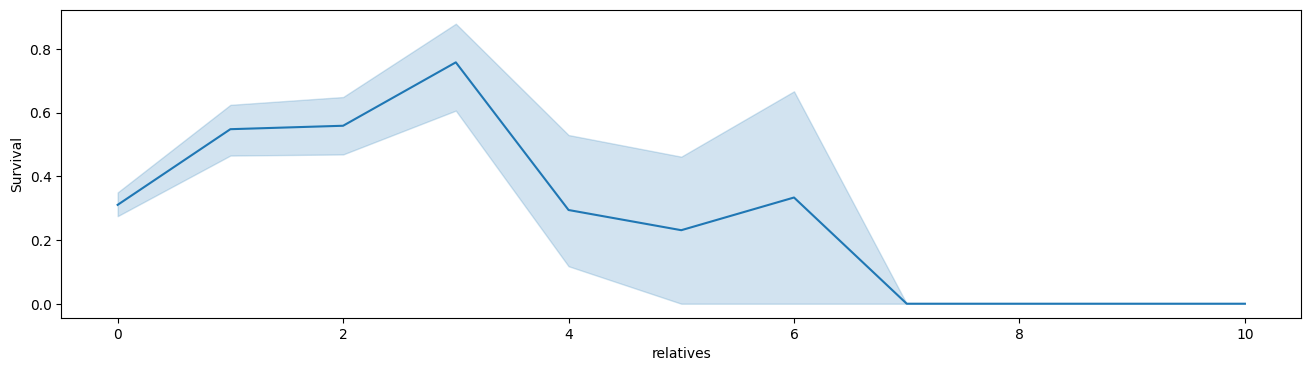

In [244]:
plt.subplots(figsize=(16, 4))
ax = sns.lineplot(x='relatives', y='Survival', data=train)
plt.show()


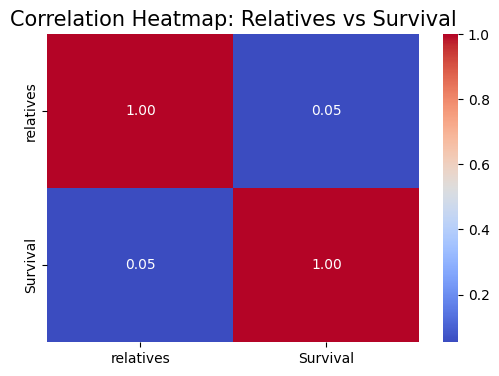

In [245]:
# Creating a correlation matrix
corr = train[['relatives', 'Survival']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap: Relatives vs Survival", fontsize=15)
plt.show()


##### It suggests that individuals from smaller families have a higher chance of survival compared to those without a family or those from larger families.

In [247]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8.0500,G6,S,2,2,0,3
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61.6792,C6,C,0,0,1,1
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8.0500,G6,S,0,0,1,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61.6792,D7,S,1,1,0,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17.3750,D,S,2,1,0,2


In [248]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,32.094002,1,0,8.0500,F G63,C,2,1,0,2
1,918,2,0,"Nesson, Mr. Israel",male,26.000000,0,0,13.5000,F2,S,0,0,1,1
2,919,1,1,"Bird, Miss. Ellen",female,29.000000,0,0,60.3896,C97,S,1,0,1,1
3,920,2,1,"Buss, Miss. Kate",female,36.000000,0,0,13.5000,F4,S,1,0,1,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.000000,1,0,8.0500,F G63,S,2,1,0,2


### Feature Creation/ Converting features into numerical values</h3>

In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass       916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          916 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Fare         916 non-null    float64
 9   Cabin        916 non-null    object 
 10  Embarked     915 non-null    object 
 11  Title        916 non-null    int64  
 12  relatives    916 non-null    int64  
 13  is_alone     916 non-null    int64  
 14  FamilySize   916 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 107.5+ KB


<h5> We can see that 'Fare' is a float data-type. Also, we need to deal with 4 categorical features: name,  Sex,  Cabin and Embarked

### Fare 
Converting 'Fare' from float64 to int64 using the astype() function provided by pandas

In [253]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)

In [254]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass       916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          916 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Fare         916 non-null    int64  
 9   Cabin        916 non-null    object 
 10  Embarked     915 non-null    object 
 11  Title        916 non-null    int64  
 12  relatives    916 non-null    int64  
 13  is_alone     916 non-null    int64  
 14  FamilySize   916 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 107.5+ KB


In [255]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,8,G6,S,2,2,0,3
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,61,C6,C,0,0,1,1
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,8,G6,S,0,0,1,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,61,D7,S,1,1,0,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,17,D,S,2,1,0,2


<h3>
  sex
</h3>
Convert feature 'Sex' into numeric values

male = 0
female = 1

In [257]:
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [258]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G6,S,2,2,0,3
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C6,C,0,0,1,1
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G6,S,0,0,1,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D7,S,1,1,0,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,S,2,1,0,2


In [259]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,relatives,is_alone,FamilySize
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,32.094002,1,0,8,F G63,C,2,1,0,2
1,918,2,0,"Nesson, Mr. Israel",0,26.000000,0,0,13,F2,S,0,0,1,1
2,919,1,1,"Bird, Miss. Ellen",1,29.000000,0,0,60,C97,S,1,0,1,1
3,920,2,1,"Buss, Miss. Kate",1,36.000000,0,0,13,F4,S,1,0,1,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,8,F G63,S,2,1,0,2


### Embarked

Convert 'Embarked' feature into numeric values

In [262]:

# One-Hot Encoding on train_dataset
embarked_dummies_train = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train, embarked_dummies_train], axis=1)
train.drop('Embarked', axis=1, inplace=True)

# Apply the same to the test_dataset
embarked_dummies_test = pd.get_dummies(test['Embarked'], prefix='Embarked')

# we should Ensure that test has the same columns as train (handle missing categories)
for col in embarked_dummies_train.columns:
    if col not in embarked_dummies_test:
        embarked_dummies_test[col] = 0  

test = pd.concat([test, embarked_dummies_test], axis=1)
test.drop('Embarked', axis=1, inplace=True)


In [263]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G6,2,2,0,3,False,False,True
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C6,0,0,1,1,True,False,False
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G6,0,0,1,1,False,False,True
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D7,1,1,0,2,False,False,True
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,2,1,0,2,False,False,True


In [264]:
# Convert boolean columns in train and test to 0 and 1
bool_cols = ['Embarked_C',	'Embarked_Q',	'Embarked_S'] 
train[bool_cols] = train[bool_cols].astype(int)
test[bool_cols] = test[bool_cols].astype(int)




In [265]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G6,2,2,0,3,0,0,1
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C6,0,0,1,1,1,0,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G6,0,0,1,1,0,0,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D7,1,1,0,2,0,0,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,2,1,0,2,0,0,1


In [266]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,32.094002,1,0,8,F G63,2,1,0,2,1,0,0
1,918,2,0,"Nesson, Mr. Israel",0,26.000000,0,0,13,F2,0,0,1,1,0,0,1
2,919,1,1,"Bird, Miss. Ellen",1,29.000000,0,0,60,C97,1,0,1,1,0,0,1
3,920,2,1,"Buss, Miss. Kate",1,36.000000,0,0,13,F4,1,0,1,1,0,0,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,8,F G63,2,1,0,2,0,0,1


### Make bins 

<h4> Age </h3>

In [269]:
age_bins = pd.qcut(train['Age'].dropna(), q=5, duplicates='drop', retbins=True)[1]
age_labels = list(range(1, len(age_bins)))  

In [270]:
train['AgeBin'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
test['AgeBin'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [271]:
# Convert to numerical values, handling NaNs
train['AgeBin'] = train['AgeBin'].astype('category').cat.codes + 1
test['AgeBin'] = test['AgeBin'].astype('category').cat.codes + 1

In [272]:
train.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G6,2,2,0,3,0,0,1,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C6,0,0,1,1,1,0,0,5
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G6,0,0,1,1,0,0,1,4
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D7,1,1,0,2,0,0,1,5
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,2,1,0,2,0,0,1,3


In [273]:
test.head(5)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,32.094002,1,0,8,F G63,2,1,0,2,1,0,0,4
1,918,2,0,"Nesson, Mr. Israel",0,26.000000,0,0,13,F2,0,0,1,1,0,0,1,3
2,919,1,1,"Bird, Miss. Ellen",1,29.000000,0,0,60,C97,1,0,1,1,0,0,1,3
3,920,2,1,"Buss, Miss. Kate",1,36.000000,0,0,13,F4,1,0,1,1,0,0,1,4
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,8,F G63,2,1,0,2,0,0,1,2


<h4> Fare </h3>

<p1> For the 'Fare' feature, we need to do the same as with the 'Age' feature. if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use pandas "qcut()" function, that we can use to see, how we can form the categories.

In [276]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G6,2,2,0,3,0,0,1,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C6,0,0,1,1,1,0,0,5
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G6,0,0,1,1,0,0,1,4
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D7,1,1,0,2,0,0,1,5
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,2,1,0,2,0,0,1,3


In [277]:
fare_bins = pd.qcut(train['Fare'], q=4, duplicates='drop', retbins=True)[1]  # Get bin edges
fare_labels = list(range(1, len(fare_bins)))  # Adjust labels dynamically

In [278]:
fare_bins

array([ 8., 17., 61.])

In [279]:
train['FareBin'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
test['FareBin'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

In [280]:
train['FareBin'] = train['FareBin'].astype('category').cat.codes + 1
test['FareBin'] = test['FareBin'].astype('category').cat.codes + 1

In [281]:
train.head(80)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.000000,0,2,8,G6,2,2,0,3,0,0,1,2,1
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.000000,0,0,61,C6,0,0,1,1,1,0,0,5,2
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.000000,0,0,8,G6,0,0,1,1,0,0,1,4,1
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.000000,1,0,61,D7,1,1,0,2,0,0,1,5,2
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.000000,1,0,17,D,2,1,0,2,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,1,0,"Baxter, Mr. Quigg Edmond",0,24.000000,0,1,61,B58 B60,0,1,0,2,1,0,0,2,2
76,77,3,1,"Mockler, Miss. Helen Mary ""Ellie""",1,23.442186,0,0,8,G6,1,0,1,1,0,1,0,2,1
77,78,1,1,"Taussig, Miss. Ruth",1,18.000000,0,2,61,E68,1,2,0,3,0,0,1,1,2
78,79,3,0,"Johnston, Mrs. Andrew G (Elizabeth ""Lily"" Watson)",1,30.320189,1,2,8,G6,2,3,0,4,0,0,1,4,1


In [282]:
test.head(100)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,32.094002,1,0,8,F G63,2,1,0,2,1,0,0,4,1
1,918,2,0,"Nesson, Mr. Israel",0,26.000000,0,0,13,F2,0,0,1,1,0,0,1,3,1
2,919,1,1,"Bird, Miss. Ellen",1,29.000000,0,0,60,C97,1,0,1,1,0,0,1,3,2
3,920,2,1,"Buss, Miss. Kate",1,36.000000,0,0,13,F4,1,0,1,1,0,0,1,4,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,8,F G63,2,1,0,2,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1012,1,1,"Greenfield, Mr. William Bertram",0,23.000000,0,1,60,D10 D12,0,1,0,2,1,0,0,2,2
96,1013,1,1,"Spedden, Mr. Frederic Oakley",0,45.000000,1,1,60,E34,0,2,0,3,1,0,0,5,2
97,1014,3,0,"Naidenoff, Mr. Penko",0,22.000000,0,0,8,F G63,0,0,1,1,0,0,1,2,1
98,1015,3,0,"Dennis, Mr. William",0,36.000000,0,0,8,F G63,0,0,1,1,0,0,1,4,1


<h3> Cabin</h3>
<P1> Convert cabin into numerical values</P1>

In [284]:
data = [train, test]

# Extract first letter of Cabin (Deck)
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].astype(str).str[0]  # Extract first letter
    dataset['Deck'] = dataset['Cabin'].astype(str).str[0]  # Extract first letter

# Define mapping for Deck encoding
deck_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Apply mapping
for dataset in data:
    dataset['Deck'] = dataset['Deck'].map(deck_mapping)  # Map deck letters to numbers
    dataset['Deck'] = dataset['Deck'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

# Verify output
print(train[['Cabin', 'Deck']].head())
print(test[['Cabin', 'Deck']].head())


  Cabin  Deck
0     G     7
1     C     3
2     G     7
3     D     4
4     D     4
  Cabin  Deck
0     F     6
1     F     6
2     C     3
3     F     6
4     F     6


In [285]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,8,G,2,2,0,3,0,0,1,2,1,7
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,61,C,0,0,1,1,1,0,0,5,2,3
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,8,G,0,0,1,1,0,0,1,4,1,7
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",1,63.0,1,0,61,D,1,1,0,2,0,0,1,5,2,4
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",1,29.0,1,0,17,D,2,1,0,2,0,0,1,3,1,4


In [286]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,32.094002,1,0,8,F,2,1,0,2,1,0,0,4,1,6
1,918,2,0,"Nesson, Mr. Israel",0,26.000000,0,0,13,F,0,0,1,1,0,0,1,3,1,6
2,919,1,1,"Bird, Miss. Ellen",1,29.000000,0,0,60,C,1,0,1,1,0,0,1,3,2,3
3,920,2,1,"Buss, Miss. Kate",1,36.000000,0,0,13,F,1,0,1,1,0,0,1,4,1,6
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,22.000000,1,0,8,F,2,1,0,2,0,0,1,2,1,6


In [287]:

data = [train, test]
for dataset in data:
    
    # Now safely convert 'Age' to integer
    dataset['Age'] = dataset['Age'].astype(int)

### Name

We've already extracted valuable insights by creating the **Title** column from the **Name** column. Since the **Name** column itself doesn’t contribute further to our analysis, it can be dropped.

In [290]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

In [291]:
train.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,1,3,1,1,24,0,2,8,G,2,2,0,3,0,0,1,2,1,7
1,2,1,0,0,46,0,0,61,C,0,0,1,1,1,0,0,5,2,3
2,3,3,0,0,38,0,0,8,G,0,0,1,1,0,0,1,4,1,7
3,4,1,1,1,63,1,0,61,D,1,1,0,2,0,0,1,5,2,4
4,5,2,1,1,29,1,0,17,D,2,1,0,2,0,0,1,3,1,4


In [292]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Cabin,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,917,3,0,1,32,1,0,8,F,2,1,0,2,1,0,0,4,1,6
1,918,2,0,0,26,0,0,13,F,0,0,1,1,0,0,1,3,1,6
2,919,1,1,1,29,0,0,60,C,1,0,1,1,0,0,1,3,2,3
3,920,2,1,1,36,0,0,13,F,1,0,1,1,0,0,1,4,1,6
4,921,3,1,1,22,1,0,8,F,2,1,0,2,0,0,1,2,1,6


In [293]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [294]:
train.dtypes

PassengerId    int64
Pclass         int64
Survival       int64
Sex            int64
Age            int64
SibSp          int64
Parch          int64
Fare           int64
Title          int64
relatives      int64
is_alone       int64
FamilySize     int64
Embarked_C     int64
Embarked_Q     int64
Embarked_S     int64
AgeBin          int8
FareBin         int8
Deck           int64
dtype: object

## Feature Selection 

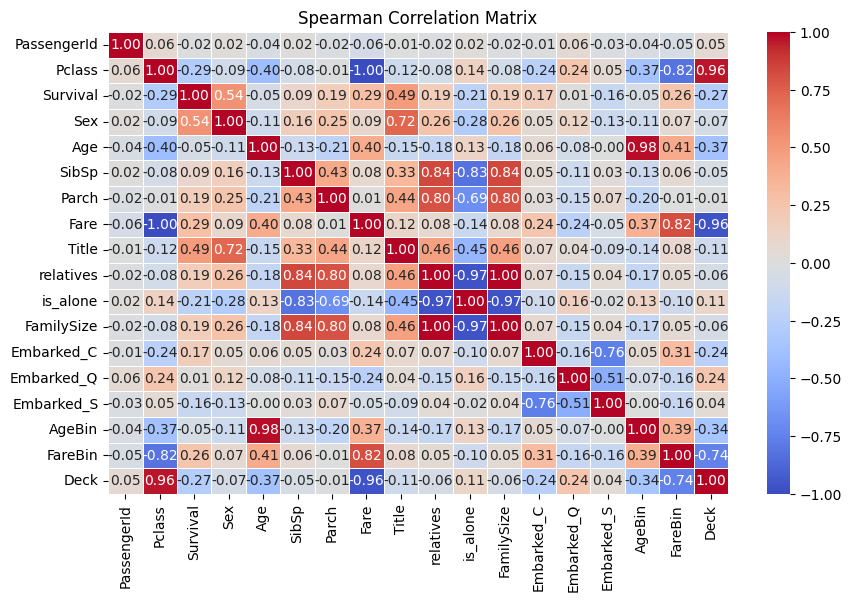

Survival       1.000000
Sex            0.535770
Title          0.487064
Fare           0.287439
FareBin        0.257473
relatives      0.186974
FamilySize     0.186974
Parch          0.186065
Embarked_C     0.173964
SibSp          0.094963
Embarked_Q     0.009982
PassengerId   -0.015261
AgeBin        -0.049186
Age           -0.054743
Embarked_S    -0.155753
is_alone      -0.211680
Deck          -0.268125
Pclass        -0.287439
Name: Survival, dtype: float64


In [296]:
spearman_corr = train.corr(method='spearman')

# Print as a matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

# Print correlation values in sorted order
print(spearman_corr["Survival"].sort_values(ascending=False))

In [297]:

print(spearman_corr['Survival'].sort_values(ascending=False))


Survival       1.000000
Sex            0.535770
Title          0.487064
Fare           0.287439
FareBin        0.257473
relatives      0.186974
FamilySize     0.186974
Parch          0.186065
Embarked_C     0.173964
SibSp          0.094963
Embarked_Q     0.009982
PassengerId   -0.015261
AgeBin        -0.049186
Age           -0.054743
Embarked_S    -0.155753
is_alone      -0.211680
Deck          -0.268125
Pclass        -0.287439
Name: Survival, dtype: float64


In [298]:
def calculate_vif(dataframe, target_column='Survived'):
    # Step 1: Drop target column if it exists
    features = dataframe.drop(columns=[target_column], errors='ignore')  

    # Step 2: Select only numeric columns
    numeric_features = features.select_dtypes(include=[np.number])

    # Step 3: Add a constant column for the intercept
    numeric_features_with_const = add_constant(numeric_features)

    # Step 4: Compute VIF for each feature
    vif_data = pd.DataFrame({
        "Feature": numeric_features_with_const.columns,
        "VIF": [variance_inflation_factor(numeric_features_with_const.values, i) 
                for i in range(numeric_features_with_const.shape[1])]
    })

    return vif_data

# Example usage
vif_results = calculate_vif(train)
print(vif_results)


        Feature         VIF
0         const    0.000000
1   PassengerId    1.010437
2        Pclass         inf
3      Survival    1.655235
4           Sex    1.818190
5           Age    7.033263
6         SibSp         inf
7         Parch         inf
8          Fare         inf
9         Title    1.815020
10    relatives         inf
11     is_alone    2.323623
12   FamilySize         inf
13   Embarked_C  147.406693
14   Embarked_Q   84.102334
15   Embarked_S  193.966318
16       AgeBin    6.480303
17      FareBin         inf
18         Deck   11.644367


C:\Users\AdminR\anaconda3\envs\new_env\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\AdminR\anaconda3\envs\new_env\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


###### **Conclusions from the VIF Results**  

1. **Multicollinearity Issues:**  
   - Several features (`SibSp`, `Parch`, `relatives`, `FamilySize`, `Embarked_C`, `Embarked_Q`, `Embarked_S`) have **infinite VIF** values, indicating **perfect multicollinearity**.  
   - This means these variables are highly correlated with each other and may cause instability in the model.  

2. **High Multicollinearity Features to Investigate:**  
   - `Pclass (VIF = 32.93)`: Strong correlation with other variables like `Fare` and `Deck`.  
   - `Fare (VIF = 12.78)`: Closely related to `Pclass`, as higher-class passengers paid higher fares.  
   - `Deck (VIF = 11.63)`: Likely dependent on `Pclass` and `Fare`.  



#### Feature Selection

The final feature selection focuses on reducing multicollinearity and keeping the most relevant predictors. Features like **SibSp, Parch, Embarked_Q, and one of Age/AgeBin**  may be dropped due to high VIF. **Cabin and PassengerId** are removed due to low correlation with survival. Key features retained include **FamilySize, Embarked_C or Embarked_S, Age or AgeBin, Sex, Fare, Title, relatives, and not_alone**. Next steps: dropping unnecessary features, rechecking VIF, and training the model for evaluation.

In [302]:
passenger_ids = test['PassengerId'].copy()

In [303]:
train.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,1,3,1,1,24,0,2,8,2,2,0,3,0,0,1,2,1,7
1,2,1,0,0,46,0,0,61,0,0,1,1,1,0,0,5,2,3
2,3,3,0,0,38,0,0,8,0,0,1,1,0,0,1,4,1,7
3,4,1,1,1,63,1,0,61,1,1,0,2,0,0,1,5,2,4
4,5,2,1,1,29,1,0,17,2,1,0,2,0,0,1,3,1,4


In [304]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Title,relatives,is_alone,FamilySize,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin,Deck
0,917,3,0,1,32,1,0,8,2,1,0,2,1,0,0,4,1,6
1,918,2,0,0,26,0,0,13,0,0,1,1,0,0,1,3,1,6
2,919,1,1,1,29,0,0,60,1,0,1,1,0,0,1,3,2,3
3,920,2,1,1,36,0,0,13,1,0,1,1,0,0,1,4,1,6
4,921,3,1,1,22,1,0,8,2,1,0,2,0,0,1,2,1,6


In [305]:
 features = ["PassengerId", 'is_alone',"Age" , "Fare", "SibSp", "Embarked_Q" ,"Parch", "relatives", "FareBin" ]


train_df = train.drop(columns=features)
test_df = test.drop(columns=features)


In [306]:
train_df.head()

,Pclass,Survival,Sex,Title,FamilySize,Embarked_C,Embarked_S,AgeBin,Deck
0,3,1,1,2,3,0,1,2,7
1,1,0,0,0,1,1,0,5,3
2,3,0,0,0,1,0,1,4,7
3,1,1,1,1,2,0,1,5,4
4,2,1,1,2,2,0,1,3,4


In [307]:
test_df.head()

,Pclass,Survival,Sex,Title,FamilySize,Embarked_C,Embarked_S,AgeBin,Deck
0,3,0,1,2,2,1,0,4,6
1,2,0,0,0,1,0,1,3,6
2,1,1,1,1,1,0,1,3,3
3,2,1,1,1,1,0,1,4,6
4,3,1,1,2,2,0,1,2,6


In [308]:
train_df.dtypes

Pclass        int64
Survival      int64
Sex           int64
Title         int64
FamilySize    int64
Embarked_C    int64
Embarked_S    int64
AgeBin         int8
Deck          int64
dtype: object

In [309]:
test_df.dtypes

Pclass        int64
Survival      int64
Sex           int64
Title         int64
FamilySize    int64
Embarked_C    int64
Embarked_S    int64
AgeBin         int8
Deck          int64
dtype: object

# 6. Model building

## Assumptions for Logistic Regression

###### 1. The Response Variable is Binary - 

In [313]:
train['Survival'].unique() 

array([1, 0])

##### 2. The Observations are Independent


The observations should be independent of each other, meaning no individual’s data should influence another's. And  our observartions is idependent

##### 3. There is No Multicollinearity Among Explanatory Variables


Assumption: The explanatory (independent) variables should not be highly correlated with each other. High correlation among features can distort the model and make it difficult to interpret

In [318]:
import statsmodels.api as sm  # Add this line to import statsmodels

# Select features for the VIF check
X = train[['Pclass', 'Sex', 'Title', 'FamilySize', 'Embarked_C', 'Embarked_S', 'Deck', 'AgeBin']]

# Add constant for the VIF calculation
X = sm.add_constant(X)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF data
print(vif_data)


      Feature        VIF
0       const  42.660260
1      Pclass   9.520532
2         Sex   1.496814
3       Title   1.699270
4  FamilySize   1.266203
5  Embarked_C   2.703270
6  Embarked_S   2.601200
7        Deck   9.089146
8      AgeBin   1.254591


In spite of the collinearity between **Deck** and **Pclass**, both features have a significant influence on the model's accuracy. Therefore, I decided to keep them.

##### 4. There are No Extreme Outliers


<P1>Assumption: Logistic regression assumes that there are no extreme outliers or influential points that disproportionately affect the model.

In [322]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Select features for logistic regression
X = train[['Pclass', 'Sex', 'Title', 'FamilySize', 'Embarked_C', 'Embarked_S','Deck', 'AgeBin']]
X = sm.add_constant(X)  # Add constant column for the intercept

# Fit the logistic regression model
log_reg_model = sm.Logit(train['Survival'], X).fit()

# Calculate influence using Logit results
influence = log_reg_model.get_influence()

# Extract Cook's Distance
cooks_distance = influence.cooks_distance[0]

# Print Cook's Distance for the first few observations
print(cooks_distance[:10])  # Checking first 10 values as an example

# Identify influential points (for example, points with Cook's Distance > 4/n)
threshold = 4 / len(X)
influential_points = cooks_distance > threshold
print("Influential Points (True if influential):")
print(influential_points)




Optimization terminated successfully.
         Current function value: 0.452635
         Iterations 6
[3.83191796e-04 1.17265805e-03 1.95666040e-05 2.70170384e-04
 1.43812597e-04 2.07423378e-03 2.45085568e-05 2.16668719e-04
 1.04530734e-04 5.55195658e-03]
Influential Points (True if influential):
[False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False False False  True False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False Fa

##### 5. There is a Linear Relationship Between Explanatory Variables and the Logit of the Response Variable
Assumption: Logistic regression assumes a linear relationship between the explanatory variables and the logit (log-odds) of the response variable.

<h6>These assumptions is fullfiled</h1>

In [325]:
    # Define features and target variable
X_train = train_df.drop(columns=['Survival'])
y_train = train_df['Survival']
X_test = test_df.drop(columns=['Survival'])
y_test = test_df['Survival']


In [326]:
# Define function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    print(f'--- {model_name} Performance ---')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.4f}')
    print('\n')
    

## Logistic Regression

--- Logistic Regression Performance ---
Accuracy: 0.8372
Precision: 0.8130
Recall: 0.7092
F1 Score: 0.7576




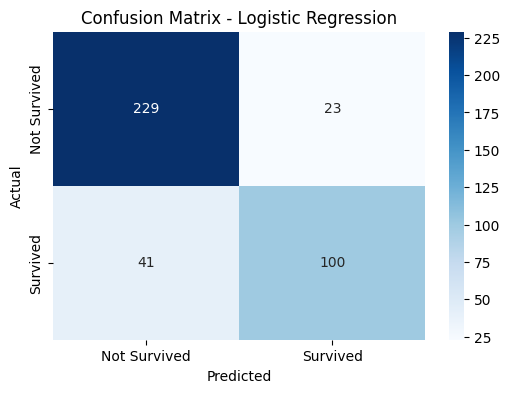

In [328]:
from sklearn.metrics import confusion_matrix

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate model performance
evaluate_model(y_test, y_pred_log, "Logistic Regression")

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show() 

### Logistic  Regression Feature Importance



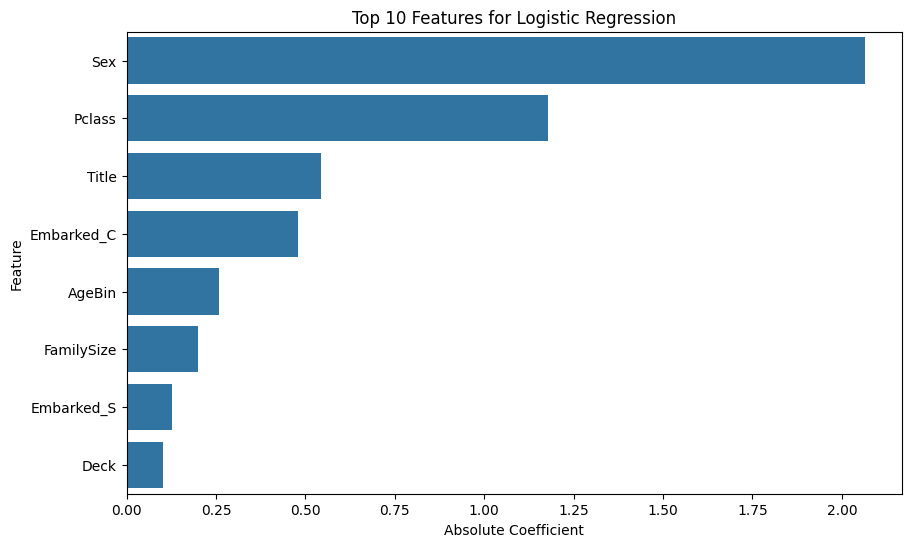

In [330]:
# After training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Get coefficients from the model
coefficients = log_reg.coef_[0]  # Extract the coefficients for the target class

# Create a DataFrame for feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the coefficients by absolute value
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features for Logistic Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


## Asummptions for Xgboost

<h5> 
1. Independence of Features (correlation handled).
    
2. No need for Feature Scaling.


3. Handles Non-linearity.


4. Absence of Multicollinearity.


5. No assumption on Data Distribution.


6. No assumption on Homoscedasticity.


7. Robust to Outliers (with caution).


8. Handles Large Sample Sizes well.

</h5>


## XGBoost

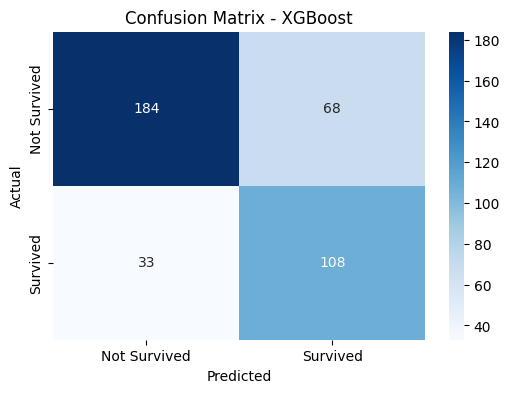

--- XGBoost Performance ---
Accuracy: 0.7430
Precision: 0.6136
Recall: 0.7660
F1 Score: 0.6814




In [334]:
# Train XGBoost model
xgb = XGBClassifier(
eval_metric='logloss',
    scale_pos_weight=1.2, learning_rate=0.05, max_depth=4, n_estimators=200
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Evaluate the XGBoost model
evaluate_model(y_test, y_pred_xgb, "XGBoost")


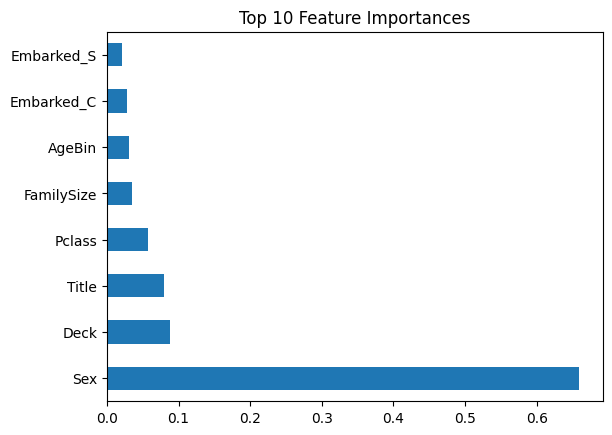

In [335]:
# Train XGBoost model
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Get feature importances
importances = xgb.feature_importances_

# Sort feature importances
feat_importances = pd.Series(importances, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


# 7. Selecting  Model

Logistic Regression is the winner in this case based on the performance metrics. Here's why:

1. **Accuracy**: Logistic Regression has a higher accuracy (0.8372) compared to XGBoost (0.7430).
   
2. **Precision**: Logistic Regression also outperforms XGBoost in precision (0.8130 vs 0.6136). This means Logistic Regression is better at correctly identifying the positive class, reducing false positives.

3. **Recall**: Although XGBoost has a higer recall (0.7660 vs 0.7092)

4. **F1 Score**: Logistic Regression has a higher F1 score (0.7576 vs 0.7054), which is a balanced measure of precision and recall.

**Conclusion**: Logistic Regression performs better overall,so it is the winner in this comparison.

## Test model

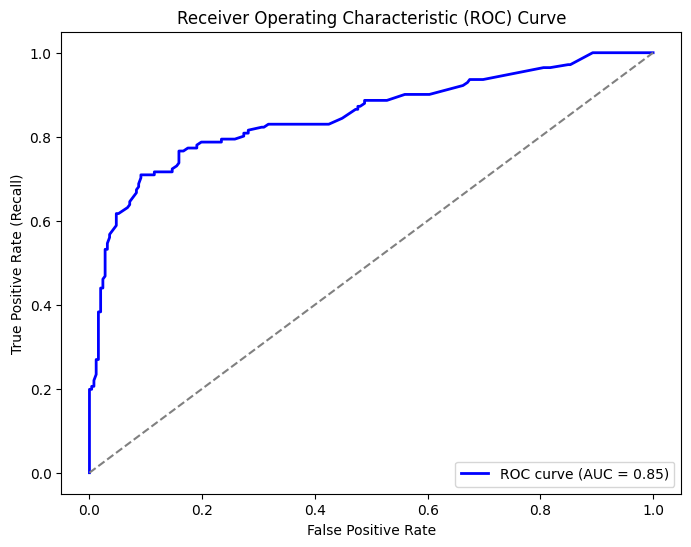

AUC: 0.8501


In [339]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Predict probabilities for class 1

# Calculate ROC curve values (FPR, TPR, and thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC value
print(f"AUC: {auc:.4f}")


interpretation:  0.8501 suggests that  model is quite good at distinguishing between the positive and negative classes (survived vs. not survived).

This indicates that, in general, model has a strong ability to correctly rank the classes, with the ability to discriminate between survivors and non-survivors.

#  8.Kaggle Compatition

## Submission File for Logistic Regression

In [343]:
# Make predictions using Logistic Regression model
y_pred_log = log_reg.predict(X_test)

# Create the submission DataFrame
submission_log_reg = pd.DataFrame({
    'PassengerId': passenger_ids ,
    'Survival': y_pred_log  
})

# Define the path to save the submission file
file_path = r"C:\Users\AdminR\Desktop\New folder\submission_log_regr.csv"

# Save the submission file to the specified location
submission_log_reg.to_csv(file_path, index=False)

# Print confirmation of file saved successfully
print("File saved successfully")


submission_log_reg.head(80)


File saved successfully


,PassengerId,Survival
0,917,1
1,918,0
2,919,1
3,920,1
4,921,1
...,...,...
75,992,1
76,993,0
77,994,0
78,995,0
